# Squats from Excel

In [247]:
import numpy as np
import pandas as pd 
import matplotlib as mp
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy.integrate import cumulative_trapezoid

Ladder in data.

In [248]:
#unityDF = pd.read_csv("unitydata (1).csv")
#wiiFitDF = pd.read_csv("my_values.csv")

unitySlowDF = pd.read_csv("unitydata_slow.csv")
#unityFastDF = pd.read_csv("unitydata_fast.csv")

wiiFitSlowDF = pd.read_csv("my_values_slow_wiifit.csv")
wiiFitFastDF = pd.read_csv("my_values_fast_wiifit.csv")


Wii Fit värdena anges i [kg] just nu så de måste multipliceras med 9,82 för att vi ska få kraftutslaget.  
Sedan behöver vi byta ut kolumnnamnen så kod kan återanvändas.

In [249]:
g = 9.82 
shift = 0.7 # [kg]


wiiFitSlowDF['Value'] = wiiFitSlowDF['Value'].map(lambda x: (x+shift)*g)
wiiFitSlowDF.rename(columns={wiiFitSlowDF.columns[0]:'time', wiiFitSlowDF.columns[1]:'force'}, inplace=True)
display(wiiFitSlowDF.head())

wiiFitFastDF['Value'] = wiiFitFastDF['Value'].map(lambda x: (x+shift)*g)
wiiFitFastDF.rename(columns={wiiFitFastDF.columns[0]:'time', wiiFitFastDF.columns[1]:'force'}, inplace=True)
display(wiiFitFastDF.head())

time     force
0  3.23  365.5986
1  3.41  523.6024
2  3.58  649.6912
3  3.76  735.7144
4  3.93  825.4692

time     force
0  3.63  406.1552
1  3.81  621.8024
2  3.97  769.6916
3  4.13  807.8914
4  4.30  823.1124

In [250]:
def removeDeadTime(rowsToDelete,df):
    df.drop(index=range(0, rowsToDelete), inplace=True)
    dataframe = df.reset_index()
    dataframe.drop(columns=['index'], inplace=True)
    display(dataframe.head())
    return dataframe

wiiFitSlowDF = removeDeadTime(75, wiiFitSlowDF)
wiiFitFastDF = removeDeadTime(75, wiiFitFastDF)

unitySlowDF = removeDeadTime(75, unitySlowDF)
#unityFastDF = removeDeadTime(0, unityFastDF)
    

time     force
0  20.77  842.3596
1  20.94  838.5298
2  21.20  841.1812
3  21.38  841.7704
4  21.54  842.4578

time     force
0  22.14  886.2550
1  22.31  837.9406
2  22.47  793.6524
3  22.64  891.1650
4  22.81  831.4594

time   force
0  16.14  827.67
1  16.30  829.04
2  16.46  827.87
3  16.62  826.46
4  16.78  828.43

Tar bort dötid

In [251]:
def shiftAllTime(df, text):
    if(df['time'].loc[0] == 0):
        return df
    else:
        X = df['time'].loc[0]
        df['time'] = df['time'].map(lambda x: (x-X))
        print(f"All {text} 'time' shifted back by: {X} [s]")
        display(df.head())
        return df

wiiFitSlowDF = shiftAllTime(wiiFitSlowDF, "Wii Fit Slow")
wiiFitFastDF = shiftAllTime(wiiFitFastDF, "Wii Fit Fast")

unitySlowDF = shiftAllTime(unitySlowDF, "Unity Slow")
#unityFastDF = shiftAllTime(unityFastDF, "Unity Fast")

All Wii Fit Slow 'time' shifted back by: 20.77 [s]


time     force
0  0.00  842.3596
1  0.17  838.5298
2  0.43  841.1812
3  0.61  841.7704
4  0.77  842.4578

All Wii Fit Fast 'time' shifted back by: 22.14 [s]


time     force
0  0.00  886.2550
1  0.17  837.9406
2  0.33  793.6524
3  0.50  891.1650
4  0.67  831.4594

All Unity Slow 'time' shifted back by: 16.14 [s]


time   force
0  0.00  827.67
1  0.16  829.04
2  0.32  827.87
3  0.48  826.46
4  0.64  828.43

Visar upp alla data-punkter

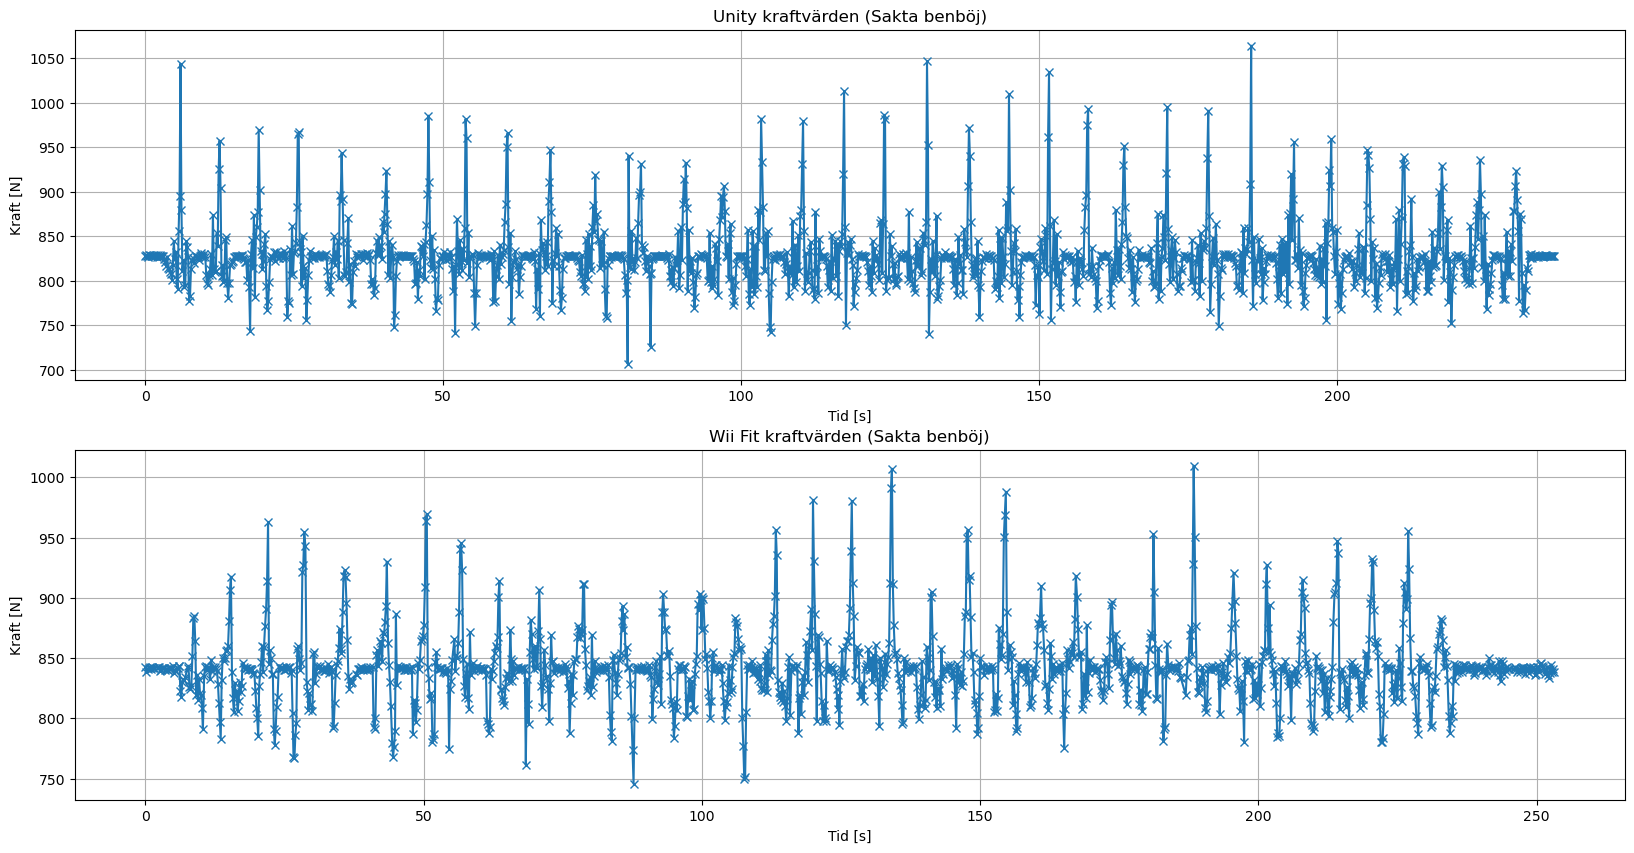

In [252]:

def plotNormalGraphs(df0, df1, title0, title1):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))

    ax1.plot(df0['time'], df0['force'], marker="x")
    #ax.plot(originalUnityDF['time'], originalUnityDF['force'], linestyle='dashed', color = "green")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.set_title(title0)
    ax1.grid()

    ax2.plot(df1['time'], df1['force'], marker="x")
    ax2.set_xlabel("Tid [s]")
    ax2.set_ylabel("Kraft [N]")
    ax2.set_title(title1)
    ax2.grid()
    plt.show()
    
plotNormalGraphs(unitySlowDF, wiiFitSlowDF, "Unity kraftvärden (Sakta benböj)", "Wii Fit kraftvärden (Sakta benböj)")
#plotNormalGraphs(unityFastDF, wiiFitFastDF, "Unity kraftvärden (Snabba benböj)", "Wii Fit kraftvärden (Snabba benböj)")


Möjligtvis inttresant [[Källa]](https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html)

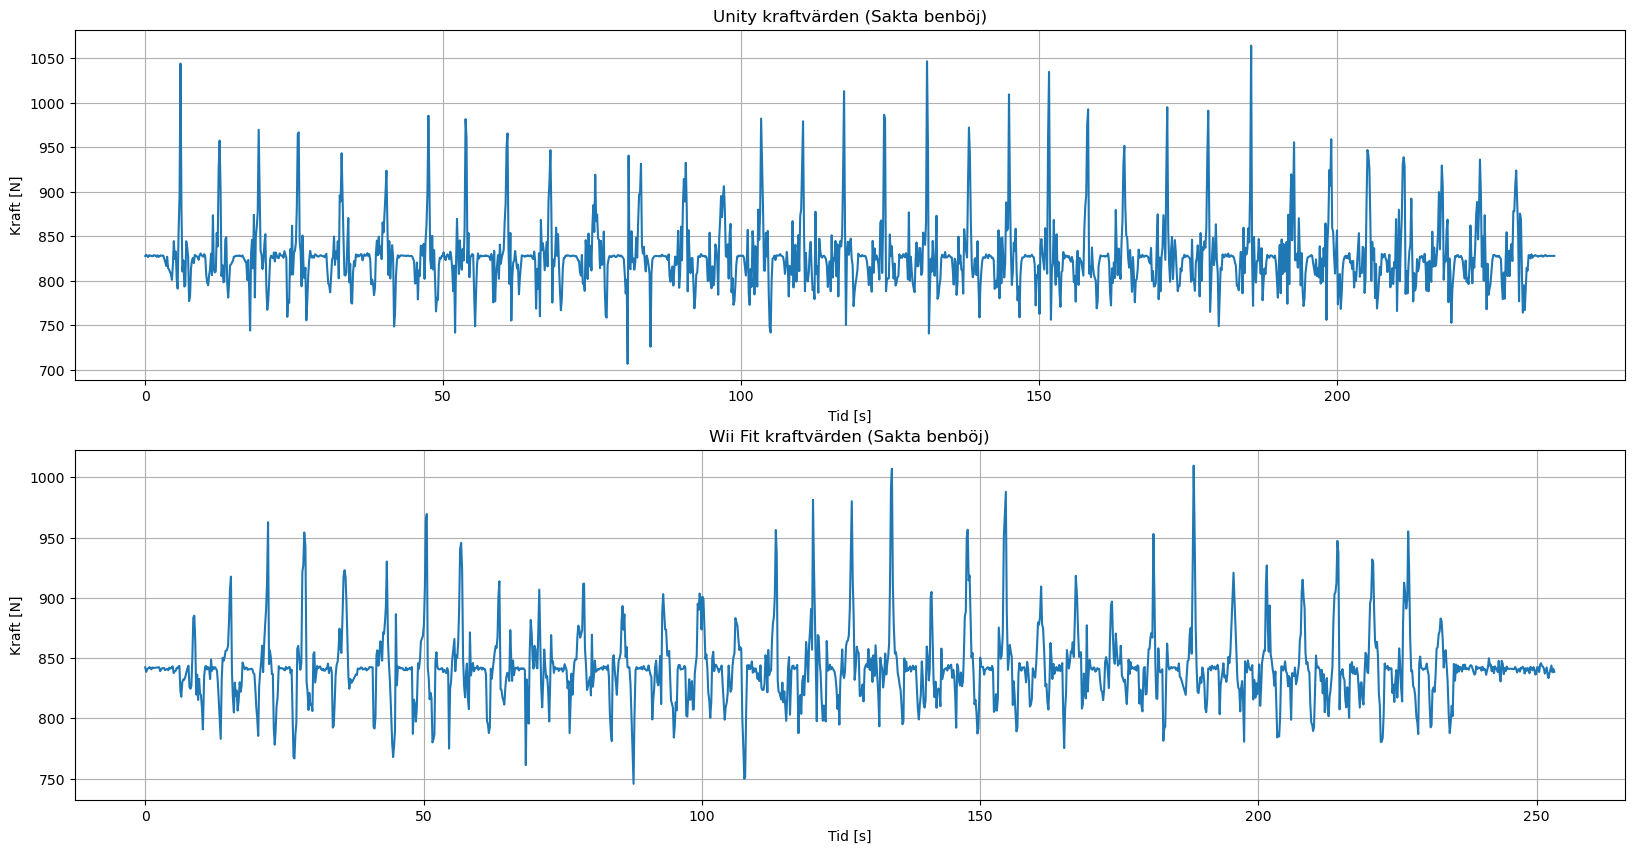

In [253]:

def plotNormalGraphs(df0, df1, title0, title1):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10))

    ax1.plot(df0['time'], df0['force'])
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.set_title(title0)
    ax1.grid()

    ax2.plot(df1['time'], df1['force'])
    ax2.set_xlabel("Tid [s]")
    ax2.set_ylabel("Kraft [N]")
    ax2.set_title(title1)
    ax2.grid()
    plt.show()
    
plotNormalGraphs(unitySlowDF, wiiFitSlowDF, "Unity kraftvärden (Sakta benböj)", "Wii Fit kraftvärden (Sakta benböj)")
#plotNormalGraphs(unityFastDF, wiiFitFastDF, "Unity kraftvärden (Snabba benböj)", "Wii Fit kraftvärden (Snabba benböj)")


Om man lägger de på varandra ges följande.

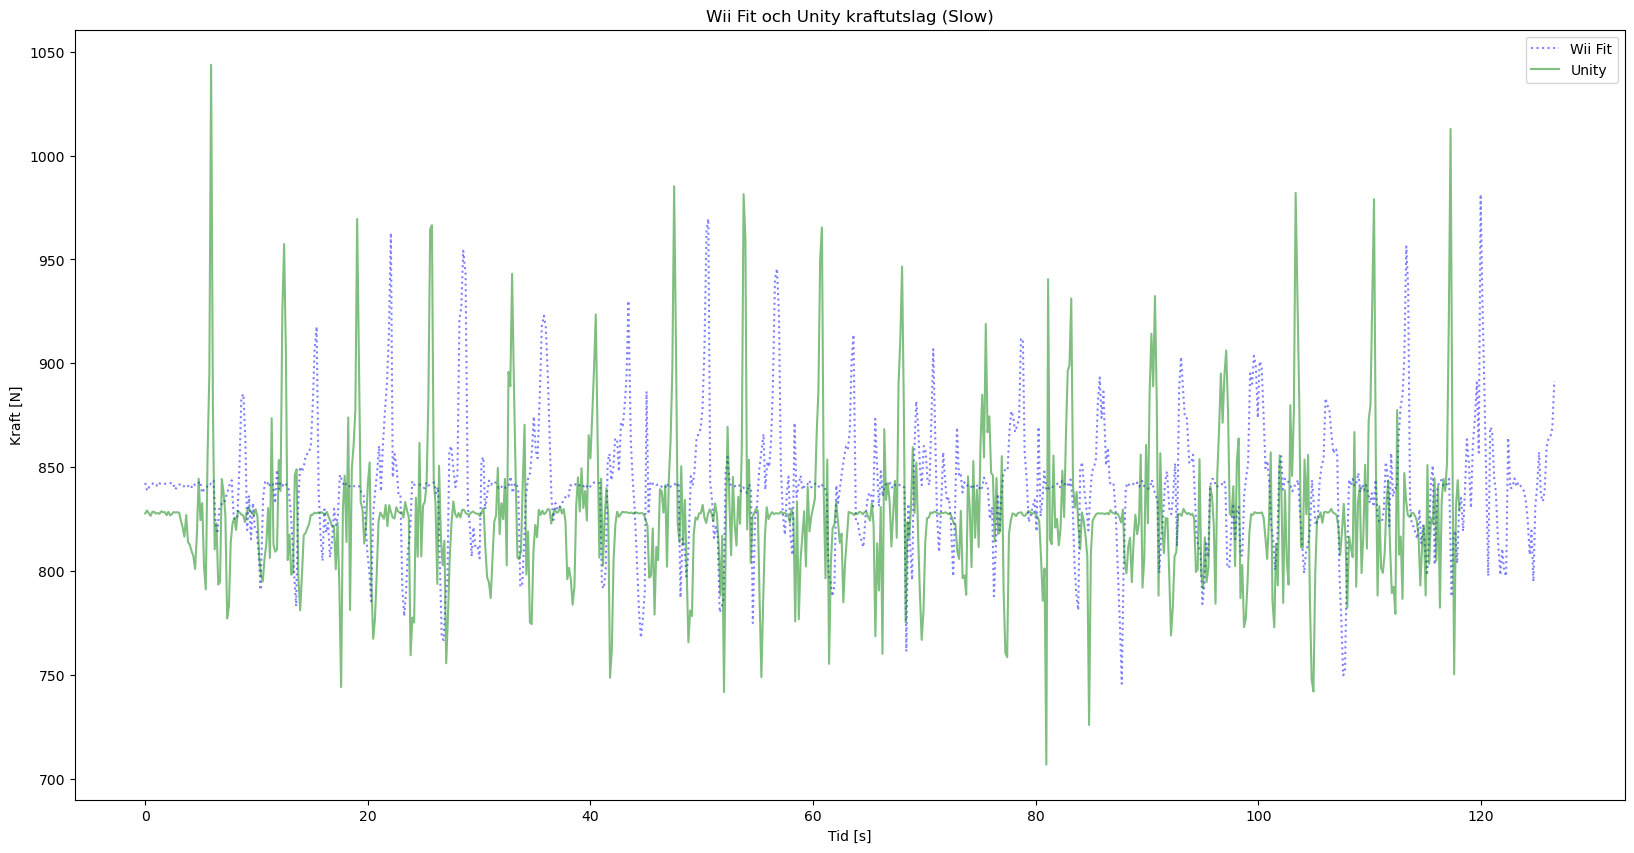

In [254]:
def plotDFsOnTopOfEachoter(df0, df1, title0, title1, type):
    fig, ax = plt.subplots(figsize=(20,10))

    ax.plot(df0['time'][0:int(df0.shape[0]/2)], df0['force'][0:int(df0.shape[0]/2)], label=title0, linestyle="dotted", color="blue", alpha=0.5)
    ax.plot(df1['time'][0:int(df1.shape[0]/2)], df1['force'][0:int(df1.shape[0]/2)], label=title1, linestyle="solid", color="green", alpha=0.5)


    ax.set_title(f"{title0} och {title1} kraftutslag ({type})")
    ax.set_xlabel("Tid [s]")
    ax.set_ylabel("Kraft [N]")
    ax.legend()



    plt.show()
    #plt.plot(data['time'], data['force'])
    #plt.figure().set_size_inches(2000, 10, forward=True)
    #plt.show()
    
    
plotDFsOnTopOfEachoter(wiiFitSlowDF, unitySlowDF, "Wii Fit", "Unity", "Sakta benböj")
#plotDFsOnTopOfEachoter(wiiFitFastDF, unityFastDF, "Wii Fit", "Unity", "Snabba benböj")


## Area beräkning

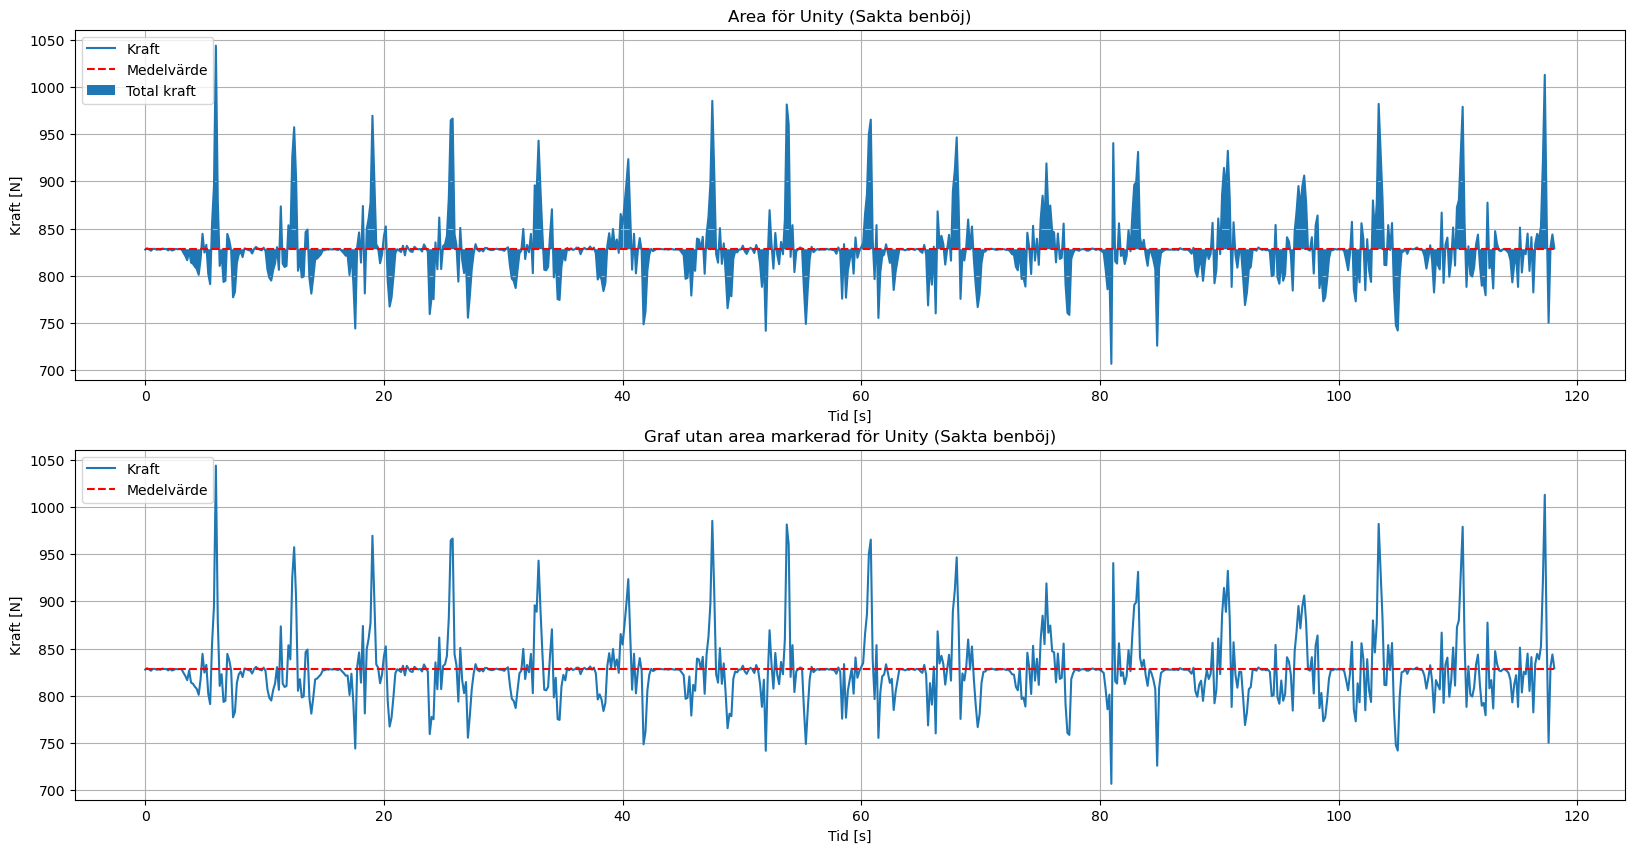

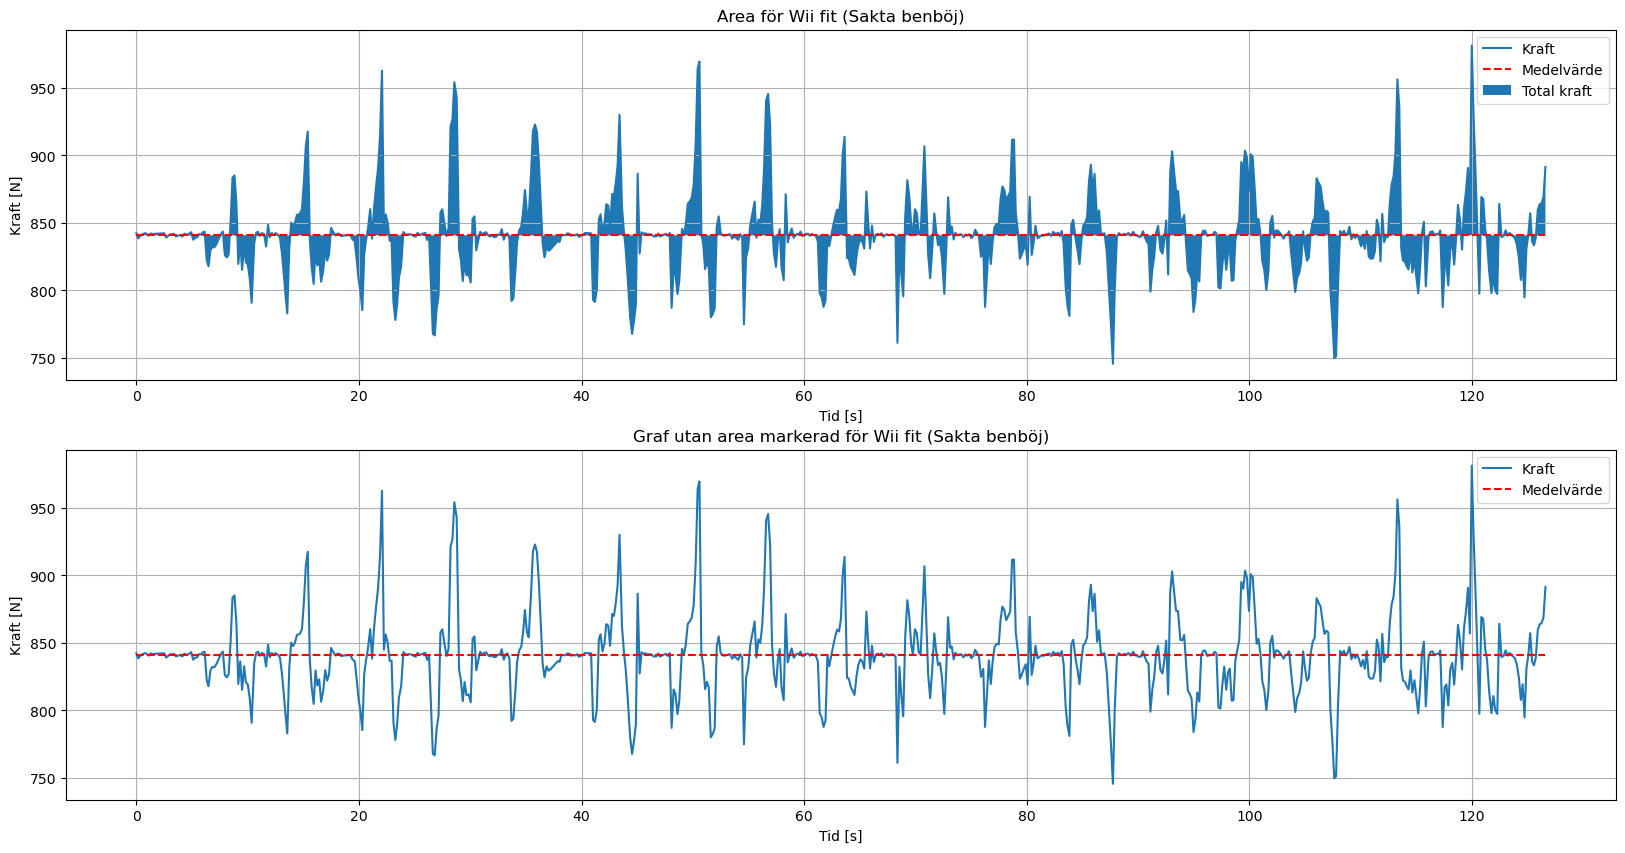

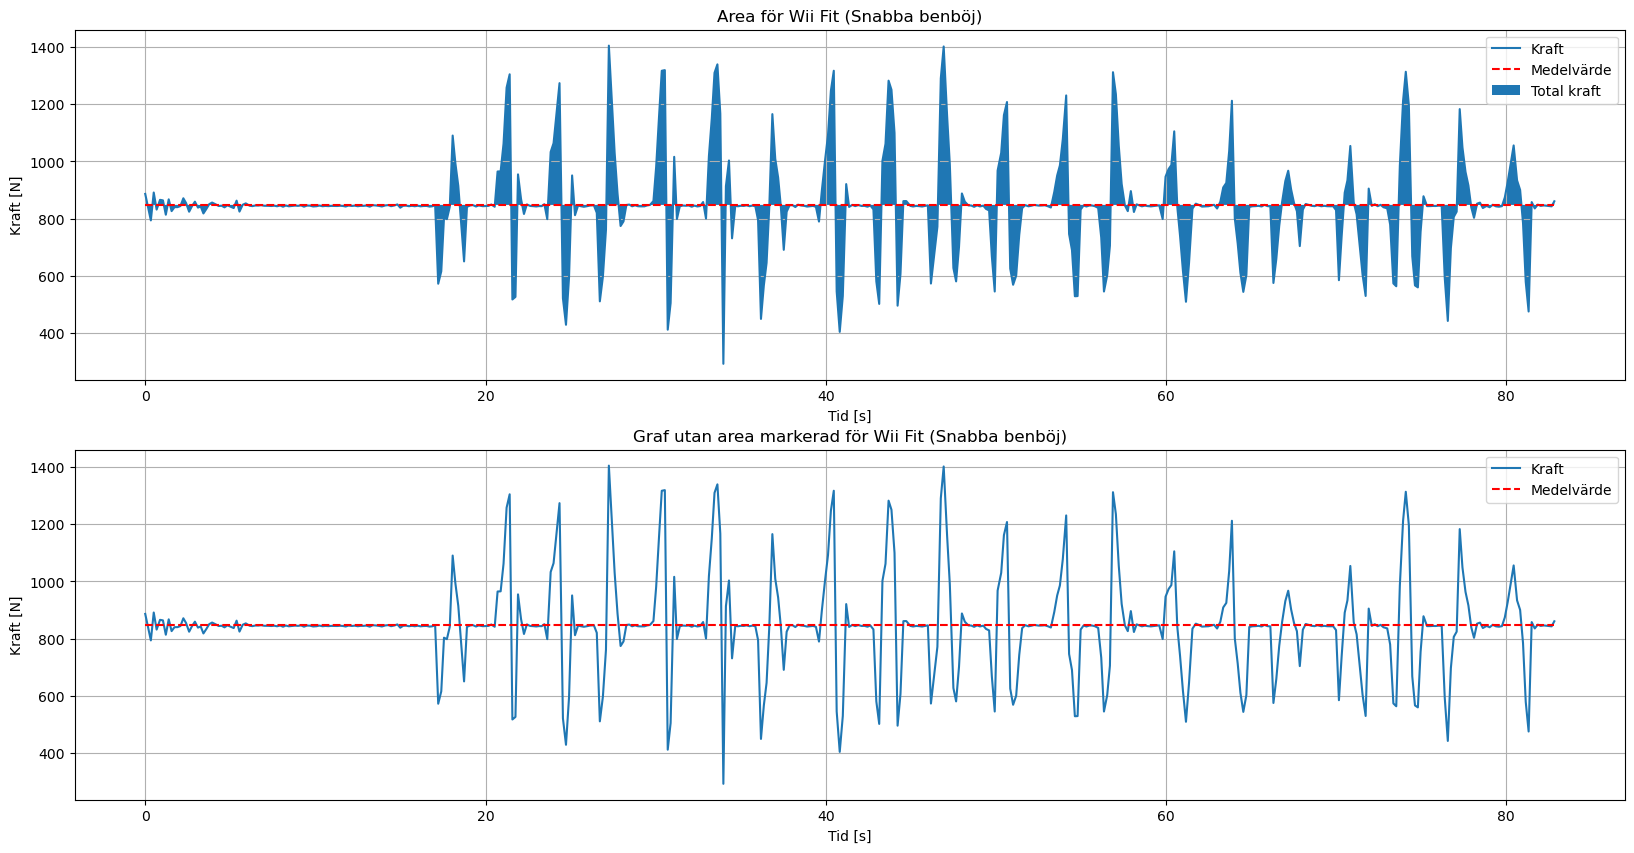

In [255]:
def showSurface(dataframe, title):
    snippetOfGraph = dataframe[0:int(dataframe.shape[0]/2)]
    horizontalLine = np.arange(0, snippetOfGraph.shape[0])

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft")
    ax1.legend()
    ax1.grid()
    ax1.set_title(f"Area för {title}")

    ax2.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax2.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
    ax2.set_xlabel("Tid [s]")
    ax2.set_ylabel("Kraft [N]")
    ax2.legend()
    ax2.grid()
    ax2.set_title(f"Graf utan area markerad för {title}")
    plt.show()

showSurface(unitySlowDF, "Unity (Sakta benböj)")
#showSurface(unityFastDF, "Unity (Snabba benblj)")

showSurface(wiiFitSlowDF, "Wii fit (Sakta benböj)")
showSurface(wiiFitFastDF, "Wii Fit (Snabba benböj)")

Marked area: 1.0


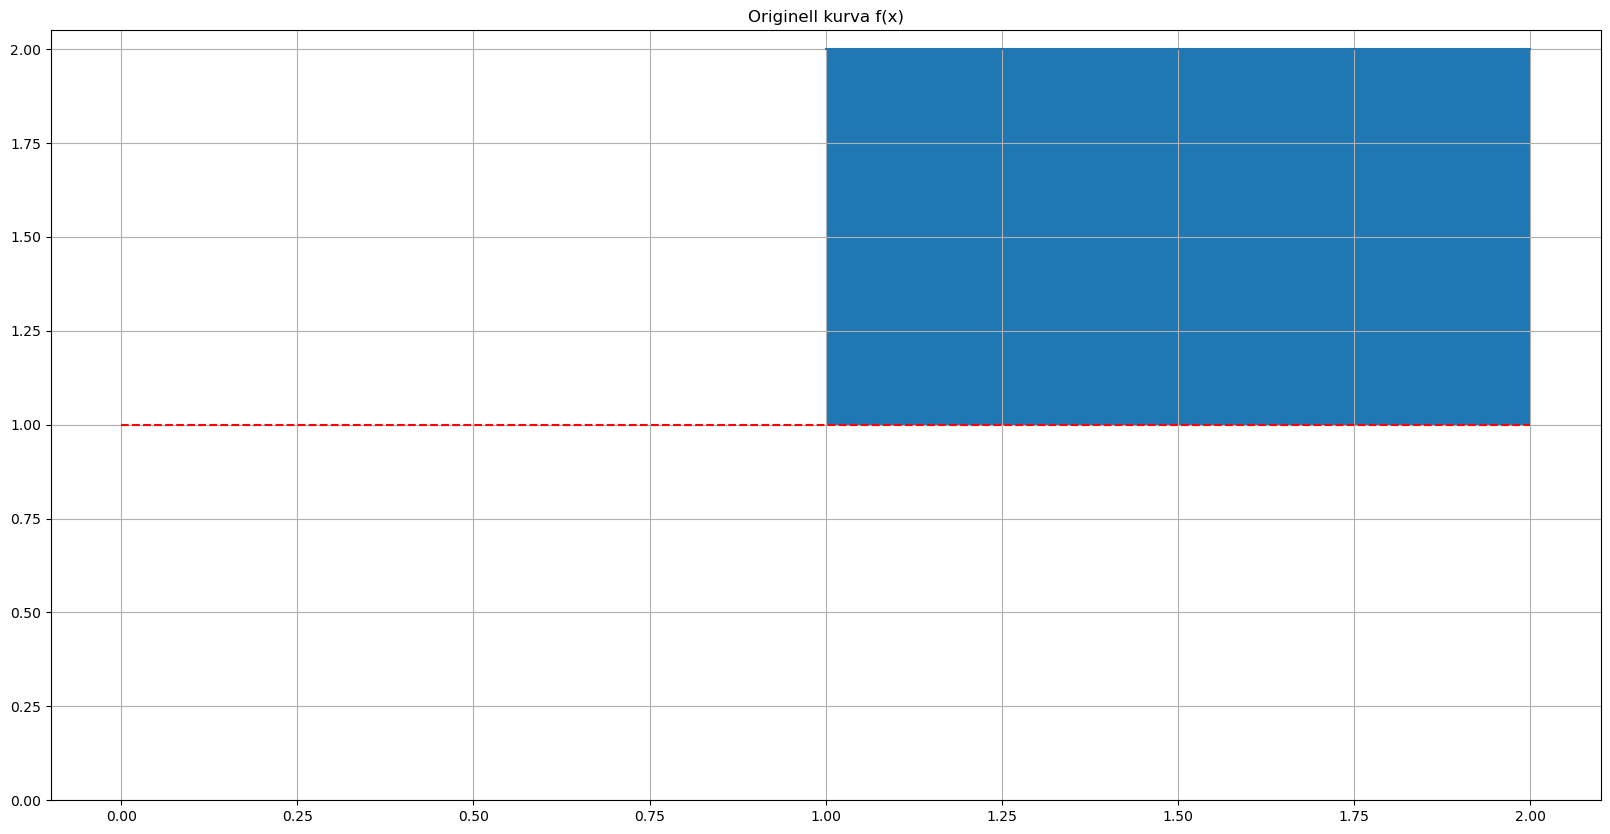

In [138]:
###############################################################
## Gammal kod
###############################################################


x_line= [1,2]
y_line= [2,2]

horizontalLine_x=[1,2]
horizontalLine_y=[1,1]


fig, axs = plt.subplots(1, figsize=(20,10))

axs.plot(x_line,y_line)
axs.grid()
axs.hlines(y=1,xmin=0, xmax=2, linestyles='dashed', colors='red')
axs.fill_between(x_line,y_line, 1)
axs.set_title("Originell kurva f(x)")
axs.set_ylim(bottom=0)


integralAbove = cumulative_trapezoid(y=y_line, x=x_line, initial=0)
integralBelow = cumulative_trapezoid(y=horizontalLine_y, x=horizontalLine_x, initial=0)

areabetween = integralAbove[len(integralAbove)-1] - integralBelow[len(integralBelow)-1]
print(f"Marked area: {areabetween}")

integralFirst = cumulative_trapezoid([1,1],[0,1],initial=0)
integralSecond = cumulative_trapezoid([1,1],[1,2],initial=0)

plt.show()




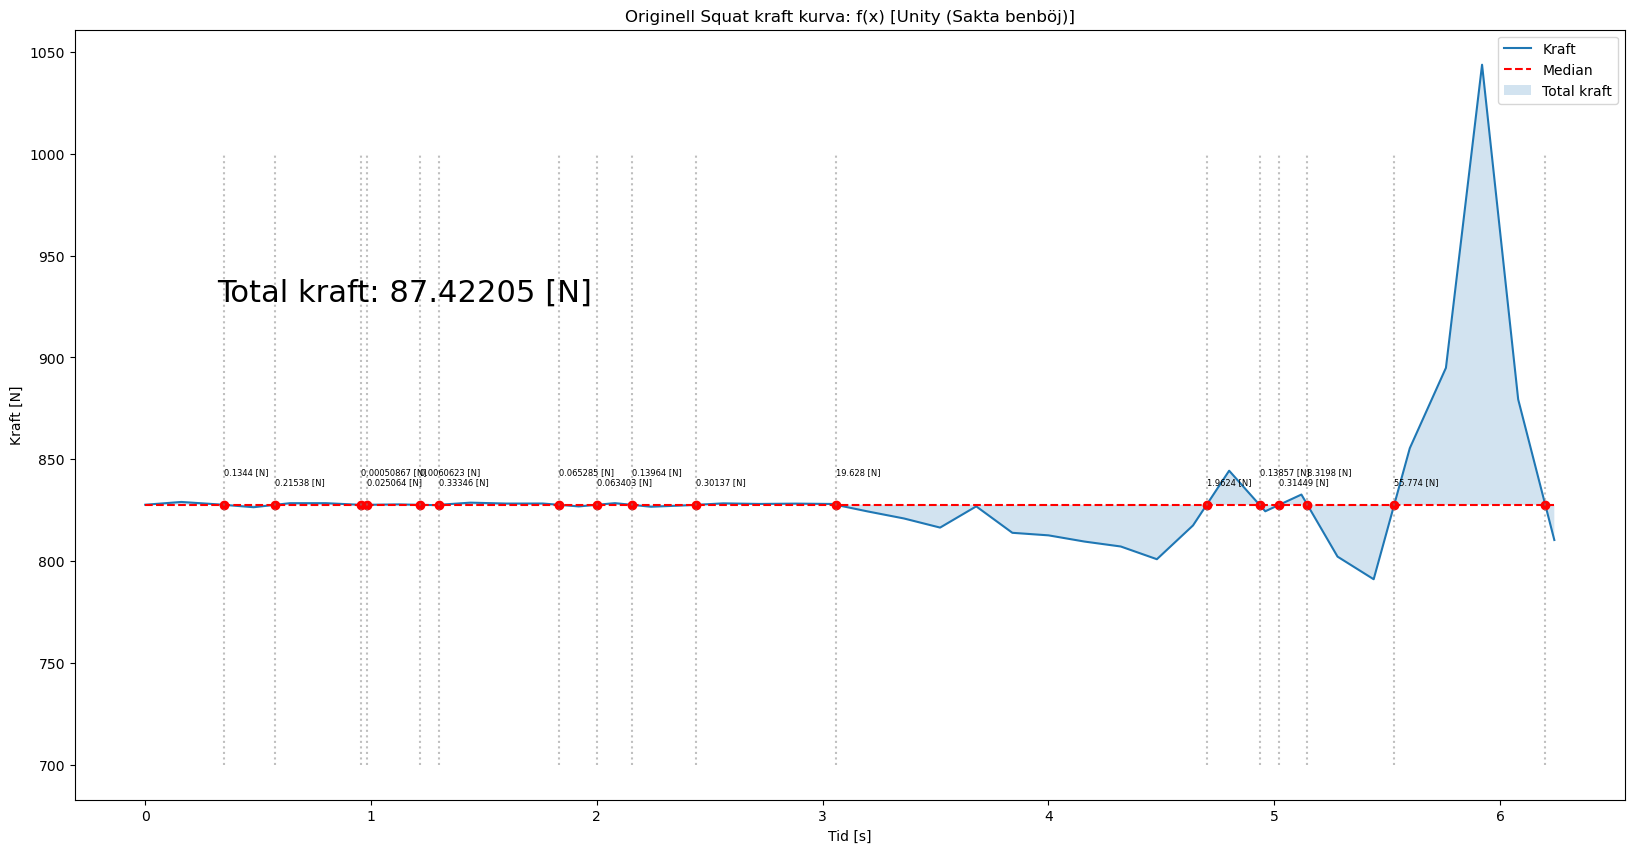

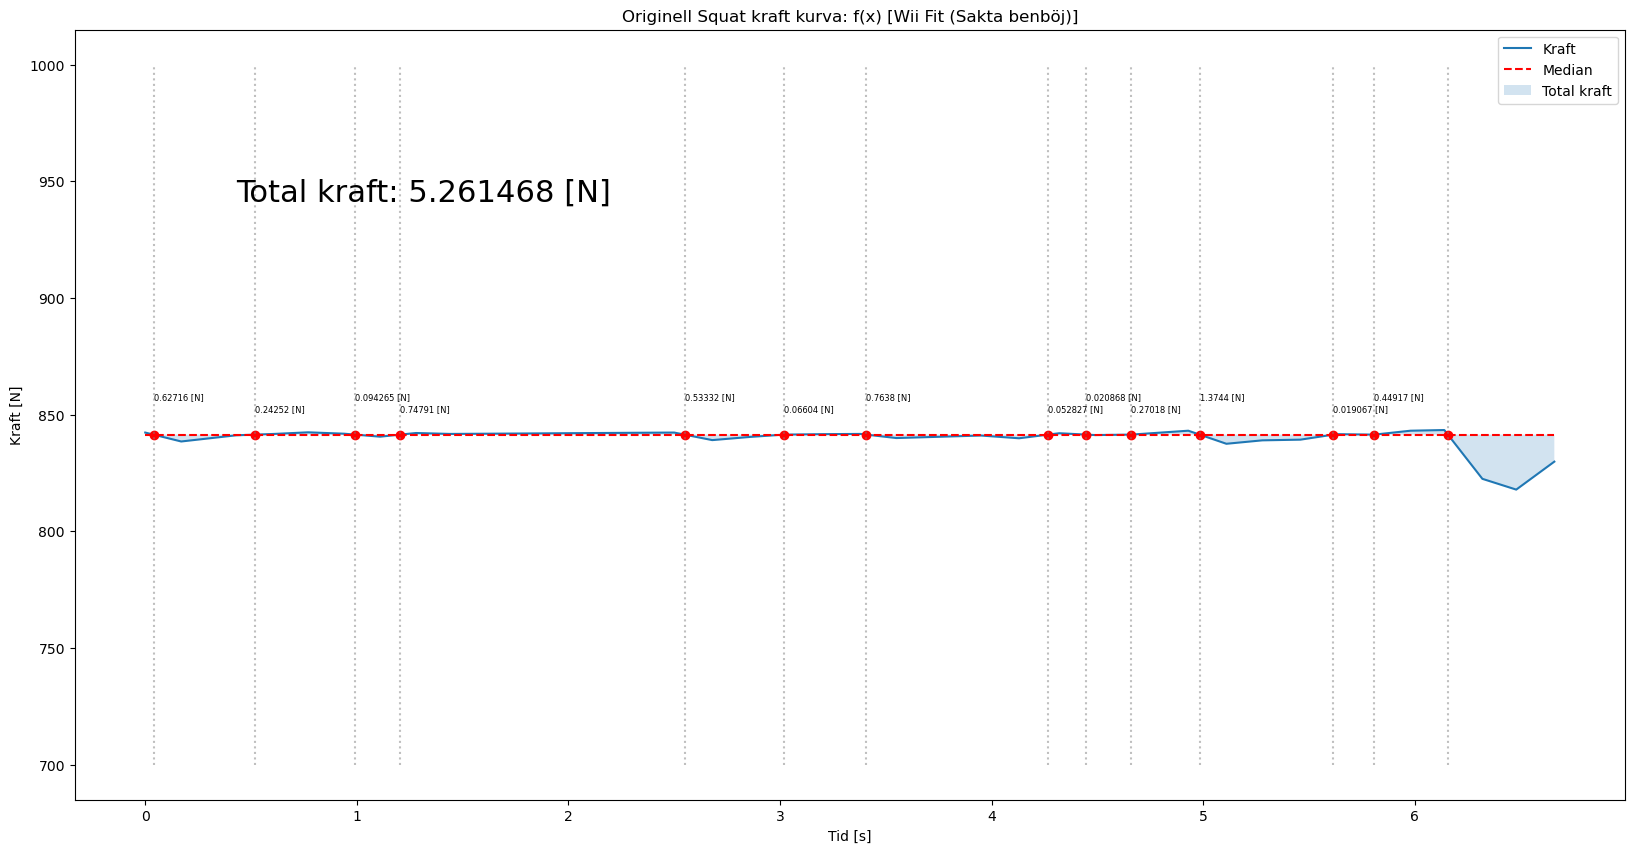

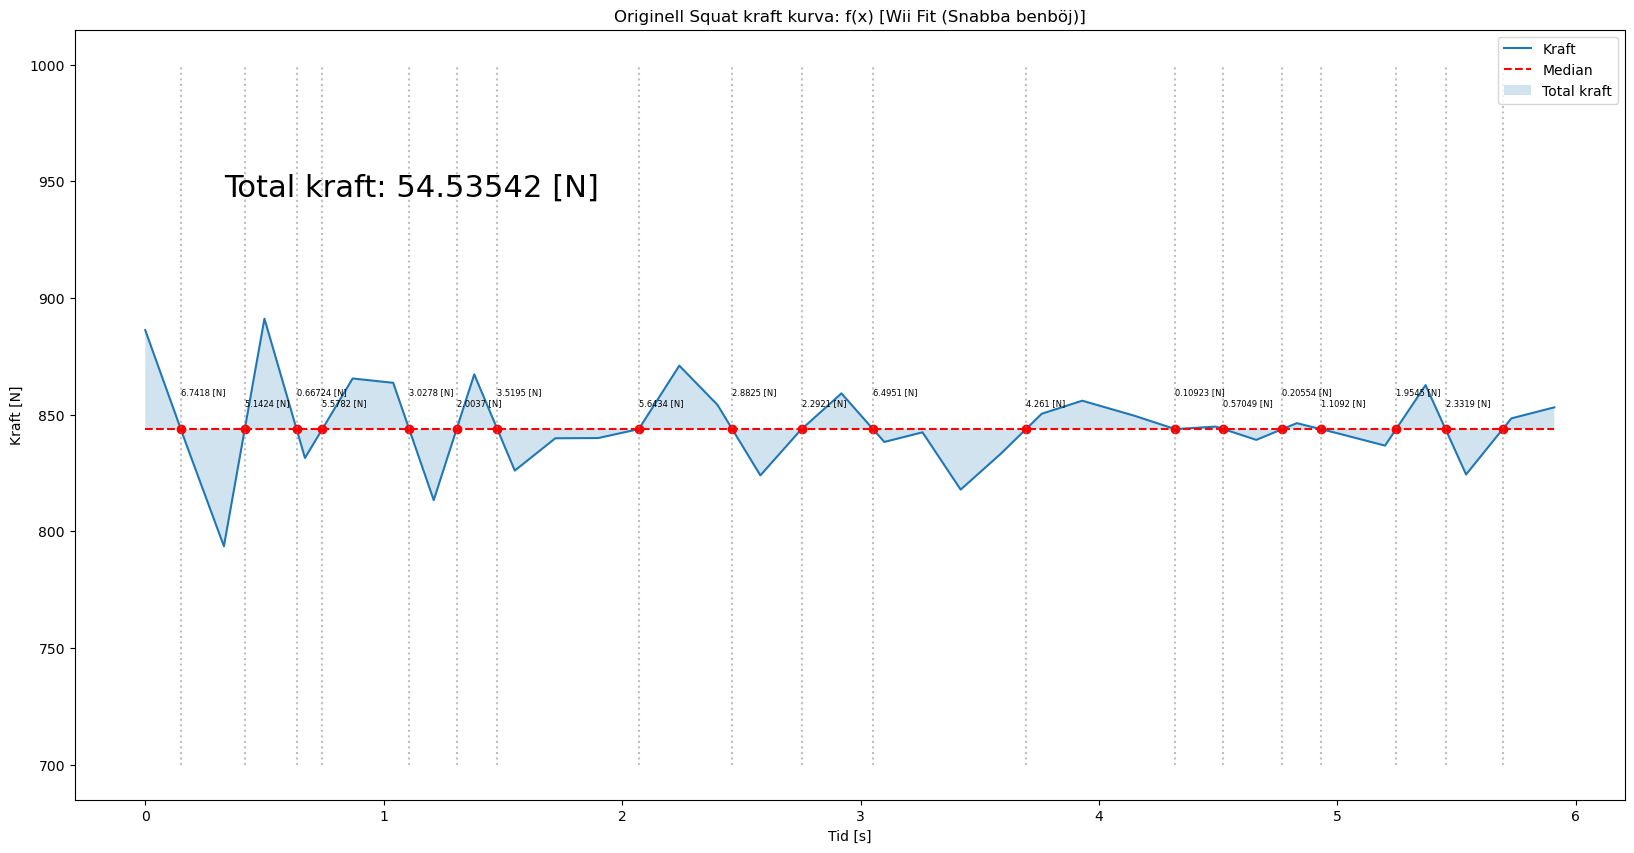

In [258]:
import numpy as np
import matplotlib.pyplot as plt

def getAndShowSurfaceOfDFWithMedian(dataframe, toRange, title, showPrints):

    snippetOfGraph = dataframe[0:toRange]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].median(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Median")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    #ax1.grid()
    ax1.set_title(f"Originell Squat kraft kurva: f(x) [{title}]")


    from shapely.geometry import LineString

    medianArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].median())

    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((medianArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    intersection.geoms

    time = []
    force = []
    for geom in intersection.geoms:
        if(type(geom) == LineString):
            for coord in geom.coords:
                time.append(coord[1])
                force.append(coord[0])
        else:    
            time.append(geom.y)
            force.append(geom.x)
    
    #ax1.plot(time, force, 'ro')
    #ax1.vlines(ymax=1000, ymin=700, x=time, linestyles="dotted", colors="gray", alpha=0.5)
    #ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Sortera time och force listorna.
    sortedTime = []

    sortedForce = []

    i = 0


    while(len(time) != 0):
        i = time.index(min(time))
        sortedTime.append(min(time))    
        sortedForce.append(force[i])
        
        time.pop(i)
        force.pop(i)
        
    ax1.plot(sortedTime, sortedForce, 'ro')
    ax1.vlines(ymax=1000, ymin=700, x=sortedTime, linestyles="dotted", colors="gray", alpha=0.5)
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].median(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    if(showPrints):
        print("Kraftkurva: F(x) \t\t\t Median G(x) \t\t\t Diff \t\t\t Positiv Diff")

    # Integrera mellan de givna punkterna
    sumForce = 0
    pos = 0
    spacer = 1
    while(pos < len(sortedTime)):
        # Skapa scliecs av force och time variablerna
        if(pos == len(sortedTime)-1):
            break
        
        timeSlice = []
        forceSlice = []
        
        # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
        timeSlice.append(sortedTime[pos])
        forceSlice.append(sortedForce[pos])



        # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
        i = 0
        while(True):
            # Lägg till de värden som kommer imellan de två 'intersections' som finns.
            if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
                i = i + 1
                continue
            if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
                break

            timeSlice.append(snippetOfGraph['time'][i])
            forceSlice.append(snippetOfGraph['force'][i])
            i = i + 1
            
        
        timeSlice.append(sortedTime[pos+1])
        forceSlice.append(sortedForce[pos+1])
        
        #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
        

        # Utför en integral med cumulative_trapezoid            
        sliceIntegral1 = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
        sliceIntegral2 = cumulative_trapezoid(y=np.full(len(forceSlice), fill_value=snippetOfGraph['force'].median()), x=timeSlice, initial=0)
        
        diff = sliceIntegral1[len(sliceIntegral1) - 1] - sliceIntegral2[len(sliceIntegral2) - 1] 
        
        if(showPrints):
            if(diff < 0):
                print(f"{sliceIntegral1[len(sliceIntegral1) - 1]:.1f} [N] \t\t - \t\t {sliceIntegral2[len(sliceIntegral2) - 1]:.1f} [N] \t\t = \t {diff:.1f} [N] \t\t (-){diff*-1:.1} [N]")
            else:
                print(f"{sliceIntegral1[len(sliceIntegral1) - 1]:.1f} [N] \t\t - \t\t {sliceIntegral2[len(sliceIntegral2) - 1]:.1f} [N] \t\t = \t {diff:.1f} [N]")
            
        if(diff < 0):
            diff = diff * -1
        #print(f"Integral values: {sliceIntegral}")
        #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


        # Ta det sista värdet i arreyen som funktionen returnarar.
        # Som sist addera integralvärdet till en summa.
        ax1.text(sortedTime[pos], snippetOfGraph['force'].median() + 10 + 5 * spacer, f'{diff:.5} [N]', fontsize = 6)
        sumForce = sumForce + diff
        if(spacer == 1):
            spacer = 0
        else:
            spacer = 1
            
        # Gå till nästa punkt.
        pos = pos + 1

    if(showPrints):
        print(f"Sum:\t\t\t\t\t\t\t\t\t\t\t\t{sumForce} [N]")
    ax1.text(snippetOfGraph['time'][2], snippetOfGraph['force'].median() + 100, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)

    ax1.legend()
    plt.show()
    

getAndShowSurfaceOfDFWithMedian(unitySlowDF, 40, "Unity (Sakta benböj)", False)
#getAndShowSurfaceOfDFWithMedian(unityFastDF, 40, "Unity (Snabba benböj)")

getAndShowSurfaceOfDFWithMedian(wiiFitSlowDF, 35, "Wii Fit (Sakta benböj)",  False)
getAndShowSurfaceOfDFWithMedian(wiiFitFastDF, 35, "Wii Fit (Snabba benböj)",  False)



False


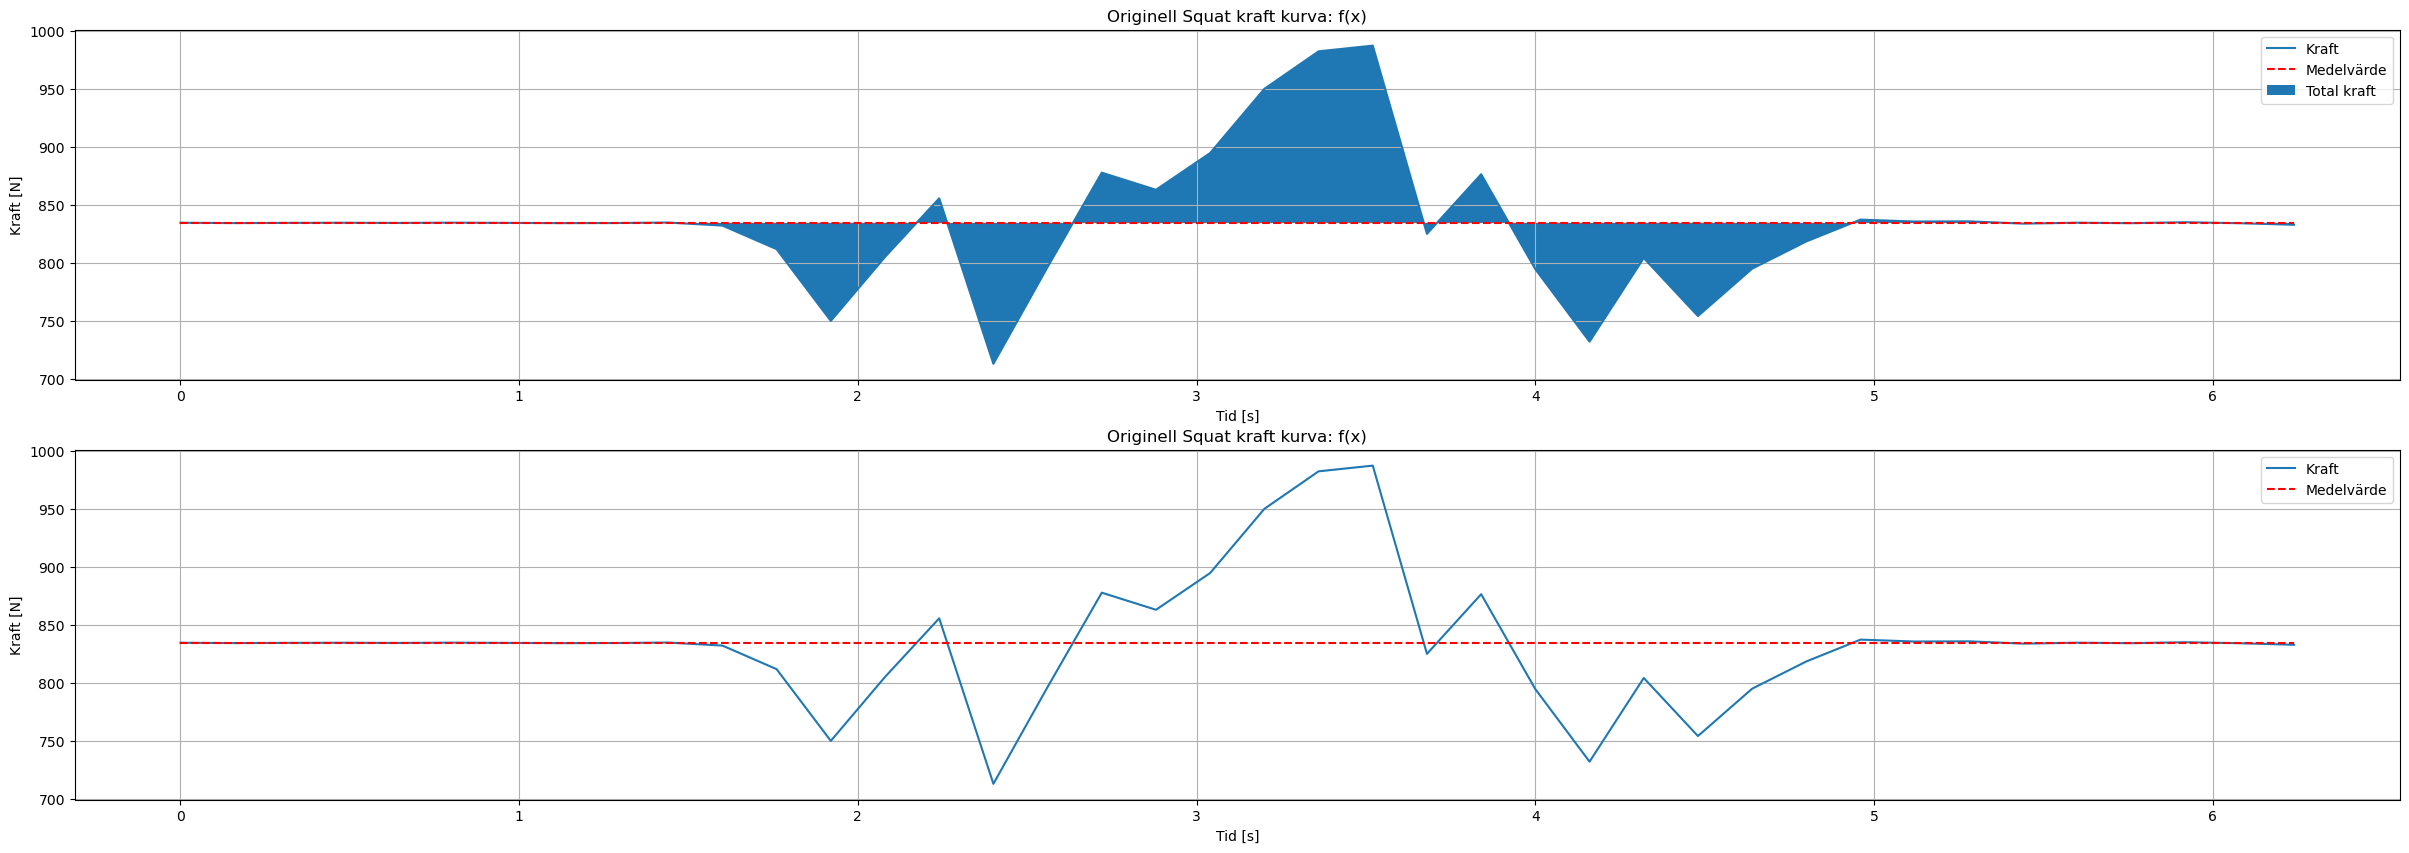

In [152]:
###############################################################
## Gammal kod
###############################################################



snippetOfGraph = unityDF[0:40]
horizontalLine = np.arange(0, snippetOfGraph.shape[0])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30,10))

ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax1.set_xlabel("Tid [s]")
ax1.set_ylabel("Kraft [N]")
ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft")
ax1.legend()
ax1.set_title("Originell Squat kraft kurva: f(x)")
ax1.grid()

ax2.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
ax2.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
ax2.set_xlabel("Tid [s]")
ax2.set_ylabel("Kraft [N]")
ax2.legend()
ax2.grid()
ax2.set_title("Originell Squat kraft kurva: f(x)")

i = 0
mean = snippetOfGraph['force'].mean()
while(i < snippetOfGraph.shape[0]):
    if(snippetOfGraph['force'][i] == mean):
        ax2.plot(snippetOfGraph['time'][i],snippetOfGraph['force'][i], marker="X")
    i = i + 1
print(snippetOfGraph['force'][0]==mean)
y_filler=np.full((snippetOfGraph.shape[0]),snippetOfGraph['force'].mean())
integralOfSnippet = cumulative_trapezoid(y_filler,snippetOfGraph['force'],initial=0)

##Hitta indices och beräkna area därimellan
##https://stackoverflow.com/questions/28766692/how-to-find-the-intersection-of-two-graphs


#print(integralOfSnippet)
#ax3.plot(snippetOfGraph['time'], integralOfSnippet)
#ax3.grid()
#ax3.set_title("Integral av f(x): F(x)")

plt.show()

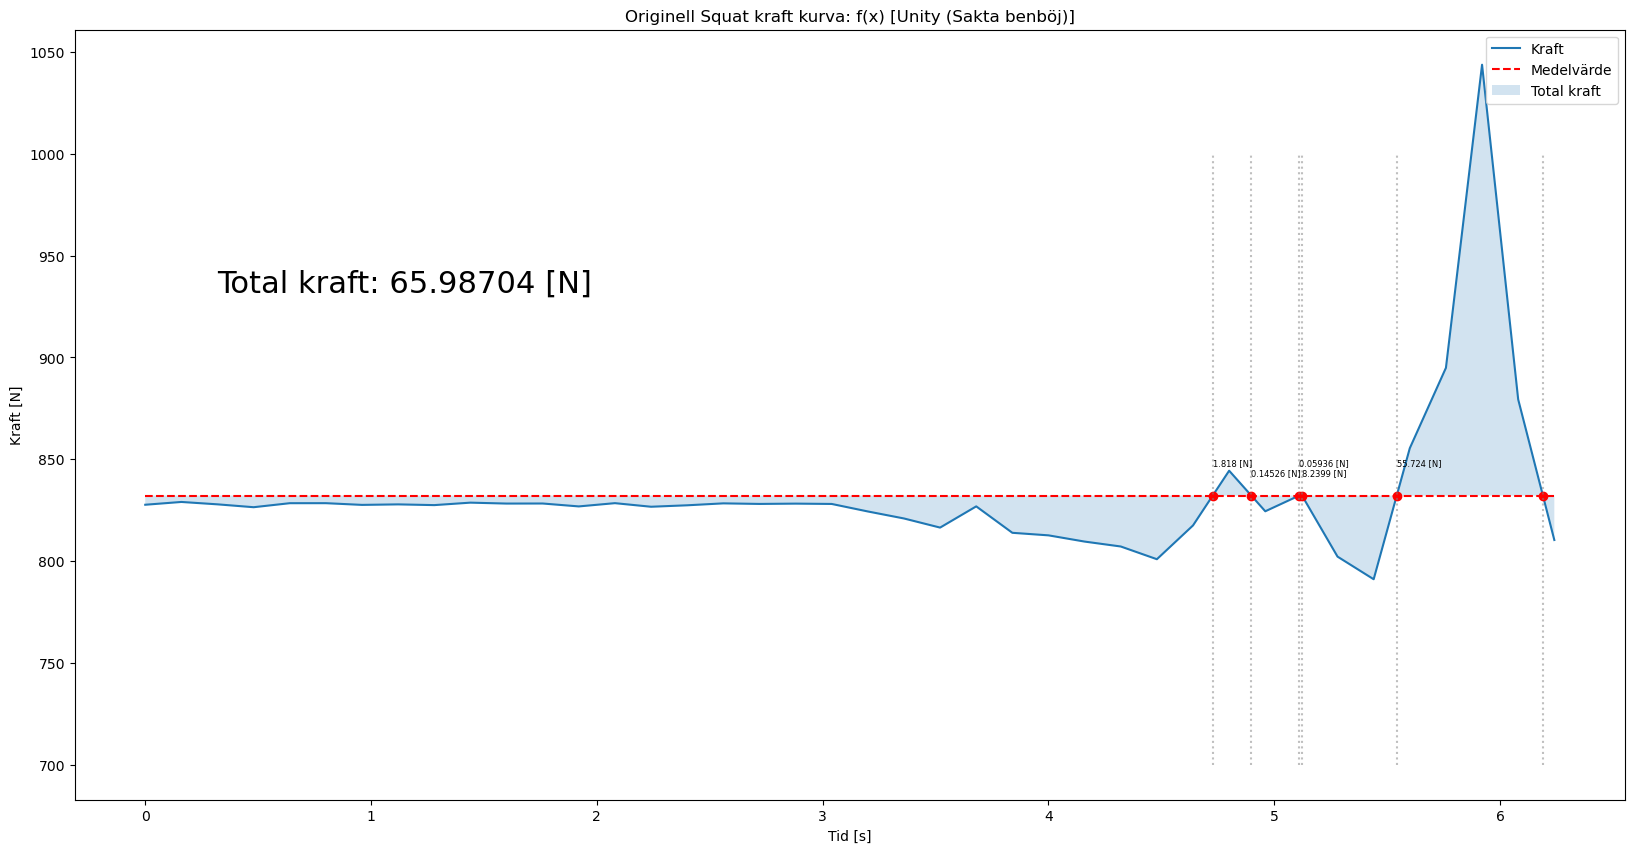

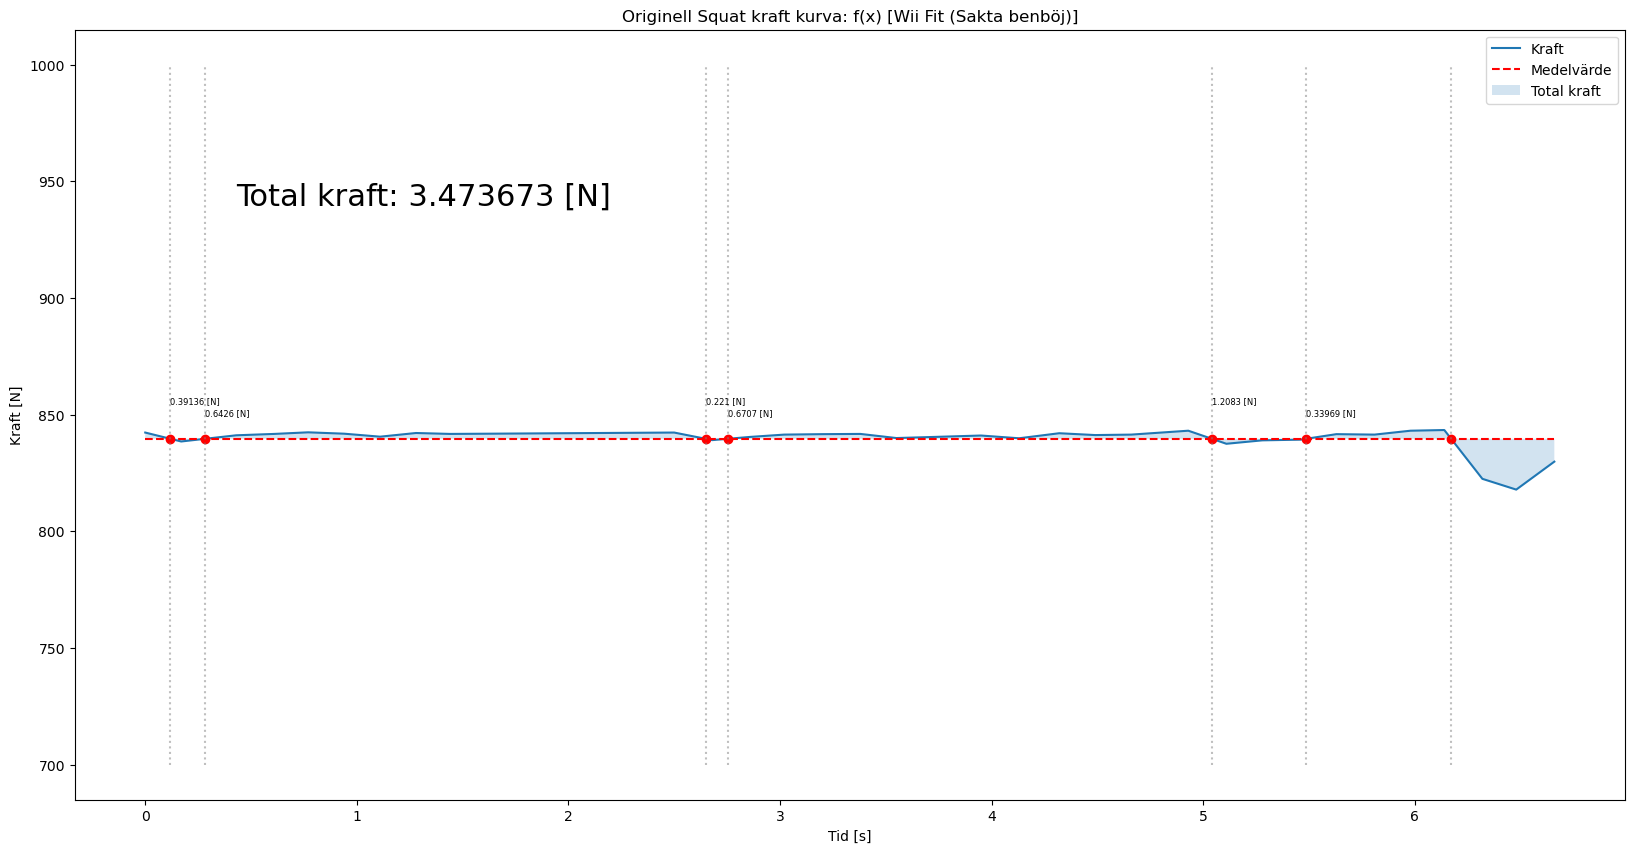

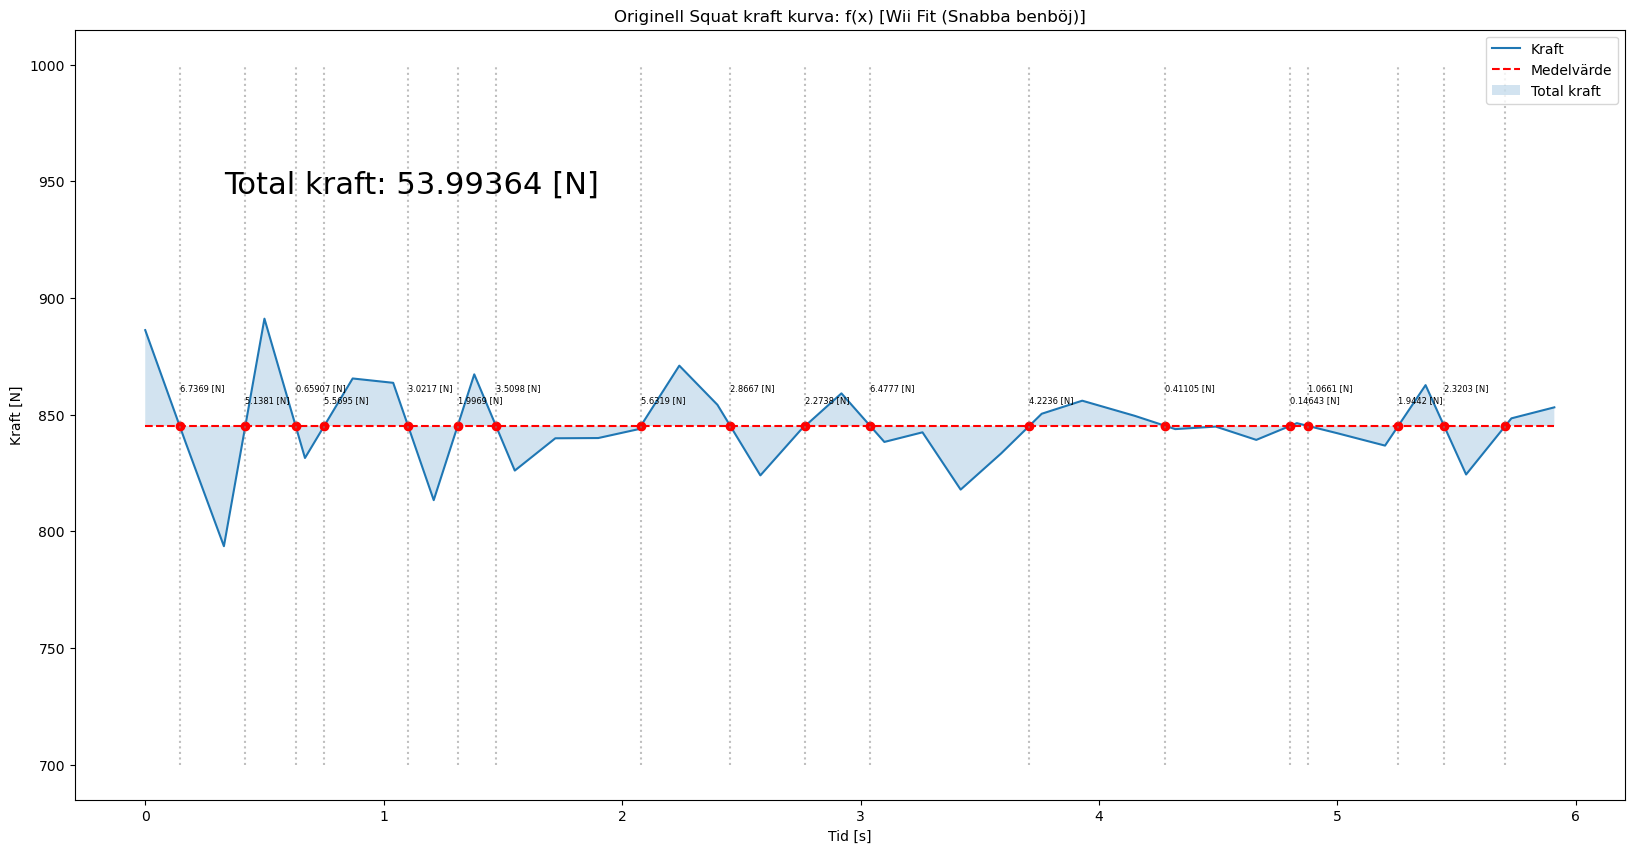

In [259]:
import numpy as np
import matplotlib.pyplot as plt

def getAndShowSurfaceOfDFWithMean(dataframe, toRange, title):

    snippetOfGraph = dataframe[0:toRange]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    #ax1.grid()
    ax1.set_title(f"Originell Squat kraft kurva: f(x) [{title}]")


    from shapely.geometry import LineString

    meanArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].mean())

    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((meanArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    intersection.geoms

    time = []
    force = []
    for geom in intersection.geoms:
        if(type(geom) == LineString):
            for coord in geom.coords:
                time.append(coord[1])
                force.append(coord[0])
        else:    
            time.append(geom.y)
            force.append(geom.x)
    
    #ax1.plot(time, force, 'ro')
    #ax1.vlines(ymax=1000, ymin=700, x=time, linestyles="dotted", colors="gray", alpha=0.5)
    #ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Sortera time och force listorna.
    sortedTime = []

    sortedForce = []

    i = 0


    while(len(time) != 0):
        i = time.index(min(time))
        sortedTime.append(min(time))    
        sortedForce.append(force[i])
        
        time.pop(i)
        force.pop(i)
        
    ax1.plot(sortedTime, sortedForce, 'ro')
    ax1.vlines(ymax=1000, ymin=700, x=sortedTime, linestyles="dotted", colors="gray", alpha=0.5)
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Integrera mellan de givna punkterna
    sumForce = 0
    pos = 0
    spacer = 1
    while(pos < len(sortedTime)):
        # Skapa scliecs av force och time variablerna
        if(pos == len(sortedTime)-1):
            break
        
        timeSlice = []
        forceSlice = []
        
        # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
        timeSlice.append(sortedTime[pos])
        forceSlice.append(sortedForce[pos])



        # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
        i = 0
        while(True):
            # Lägg till de värden som kommer imellan de två 'intersections' som finns.
            if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
                i = i + 1
                continue
            if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
                break

            timeSlice.append(snippetOfGraph['time'][i])
            forceSlice.append(snippetOfGraph['force'][i])
            i = i + 1
            
        
        timeSlice.append(sortedTime[pos+1])
        forceSlice.append(sortedForce[pos+1])
        
        #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
        

        # Utför en integral med cumulative_trapezoid    
        sliceIntegral1 = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
        sliceIntegral2 = cumulative_trapezoid(y=np.full(len(forceSlice), fill_value=snippetOfGraph['force'].median()), x=timeSlice, initial=0)        
        diff = sliceIntegral1[len(sliceIntegral1) - 1] - sliceIntegral2[len(sliceIntegral2) - 1] 
        
        if(diff < 0):
            diff = diff * -1
        
        #print(f"Integral values: {sliceIntegral}")
        #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


        # Ta det sista värdet i arreyen som funktionen returnarar.
        # Som sist addera integralvärdet till en summa.
        ax1.text(sortedTime[pos], snippetOfGraph['force'].mean() + 10 + 5 * spacer, f'{diff:.5} [N]', fontsize = 6)
        sumForce = sumForce + diff
        if(spacer == 1):
            spacer = 0
        else:
            spacer = 1
            
        # Gå till nästa punkt.
        pos = pos + 1

    ax1.text(snippetOfGraph['time'][2], snippetOfGraph['force'].mean() + 100, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)

    ax1.legend()
    plt.show()

getAndShowSurfaceOfDFWithMean(unitySlowDF, 40, "Unity (Sakta benböj)")
#getAndShowSurfaceOfDFWithMean(unityFastDF, 35, "Unity (Snabba benböj)")


getAndShowSurfaceOfDFWithMean(wiiFitSlowDF, 35, "Wii Fit (Sakta benböj)")
getAndShowSurfaceOfDFWithMean(wiiFitFastDF, 35, "Wii Fit (Snabba benböj)")






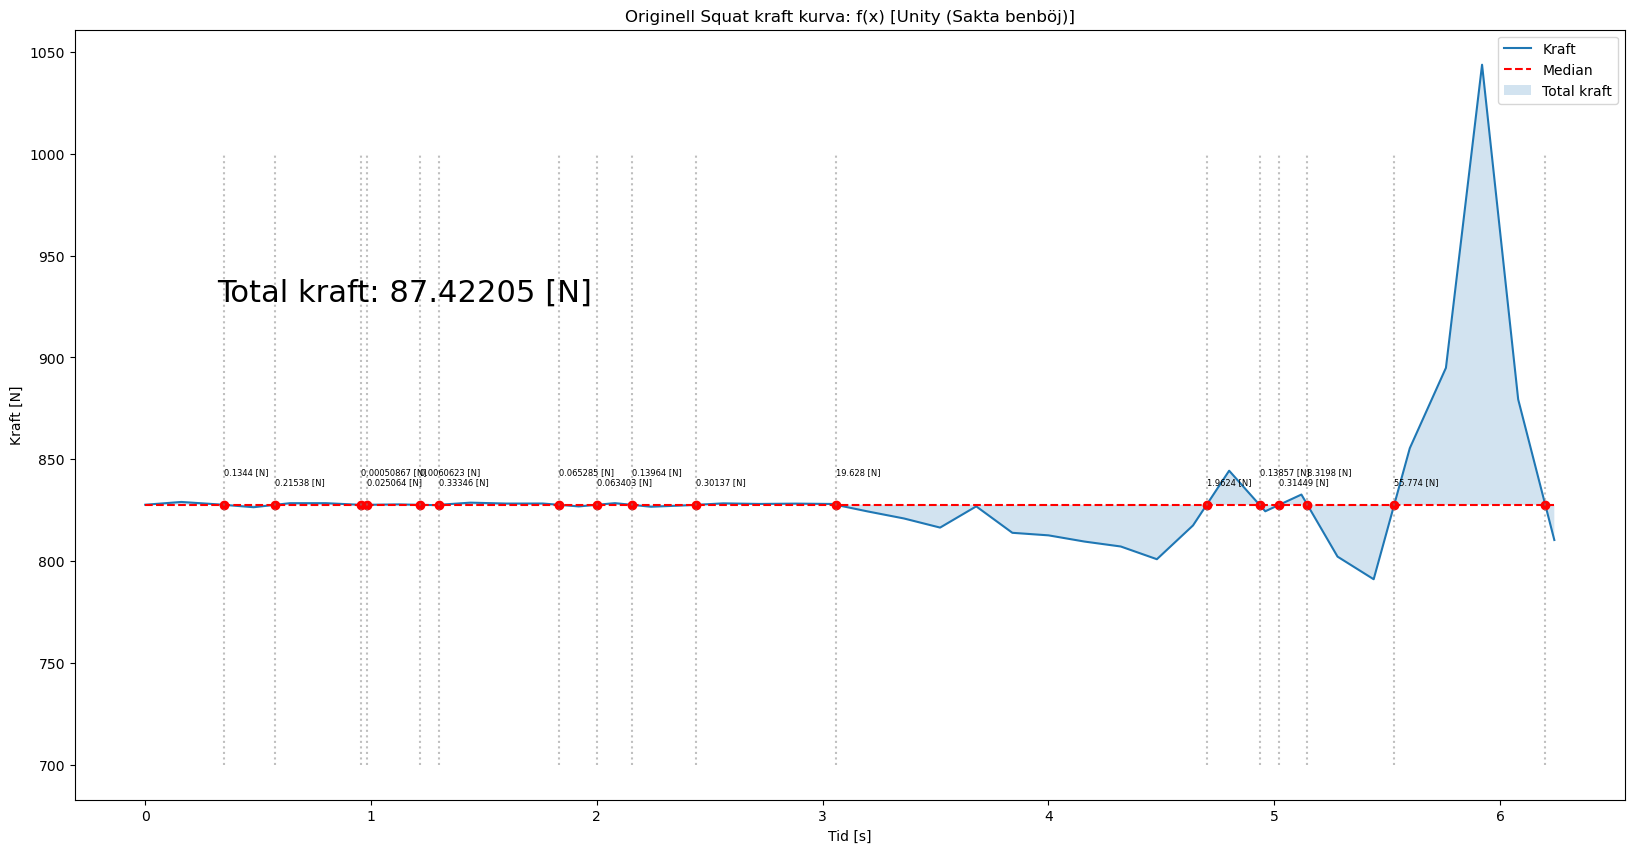

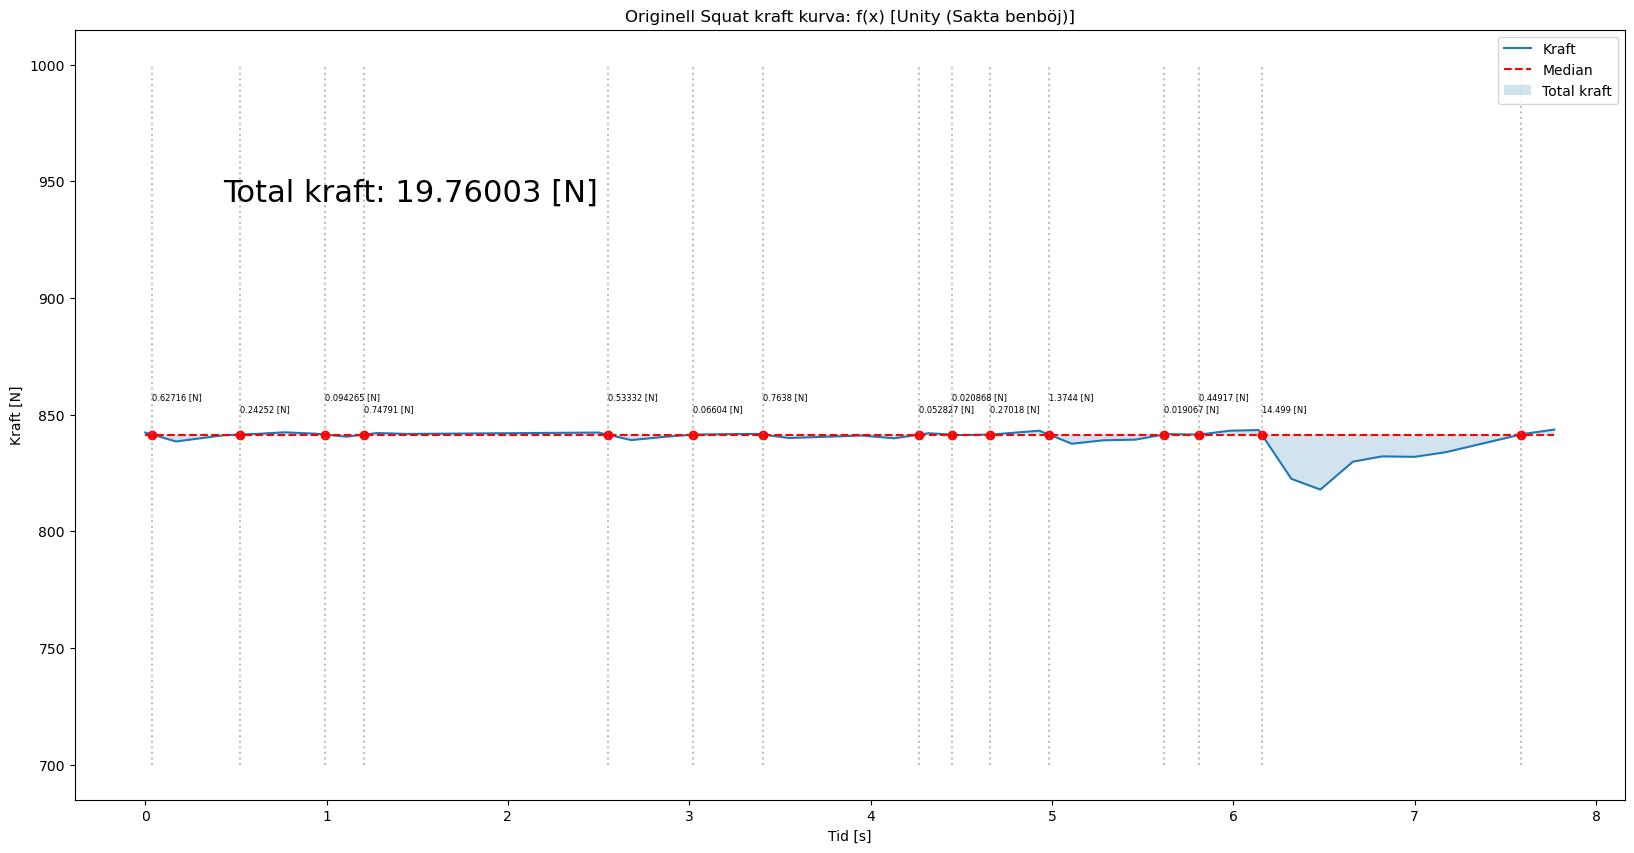

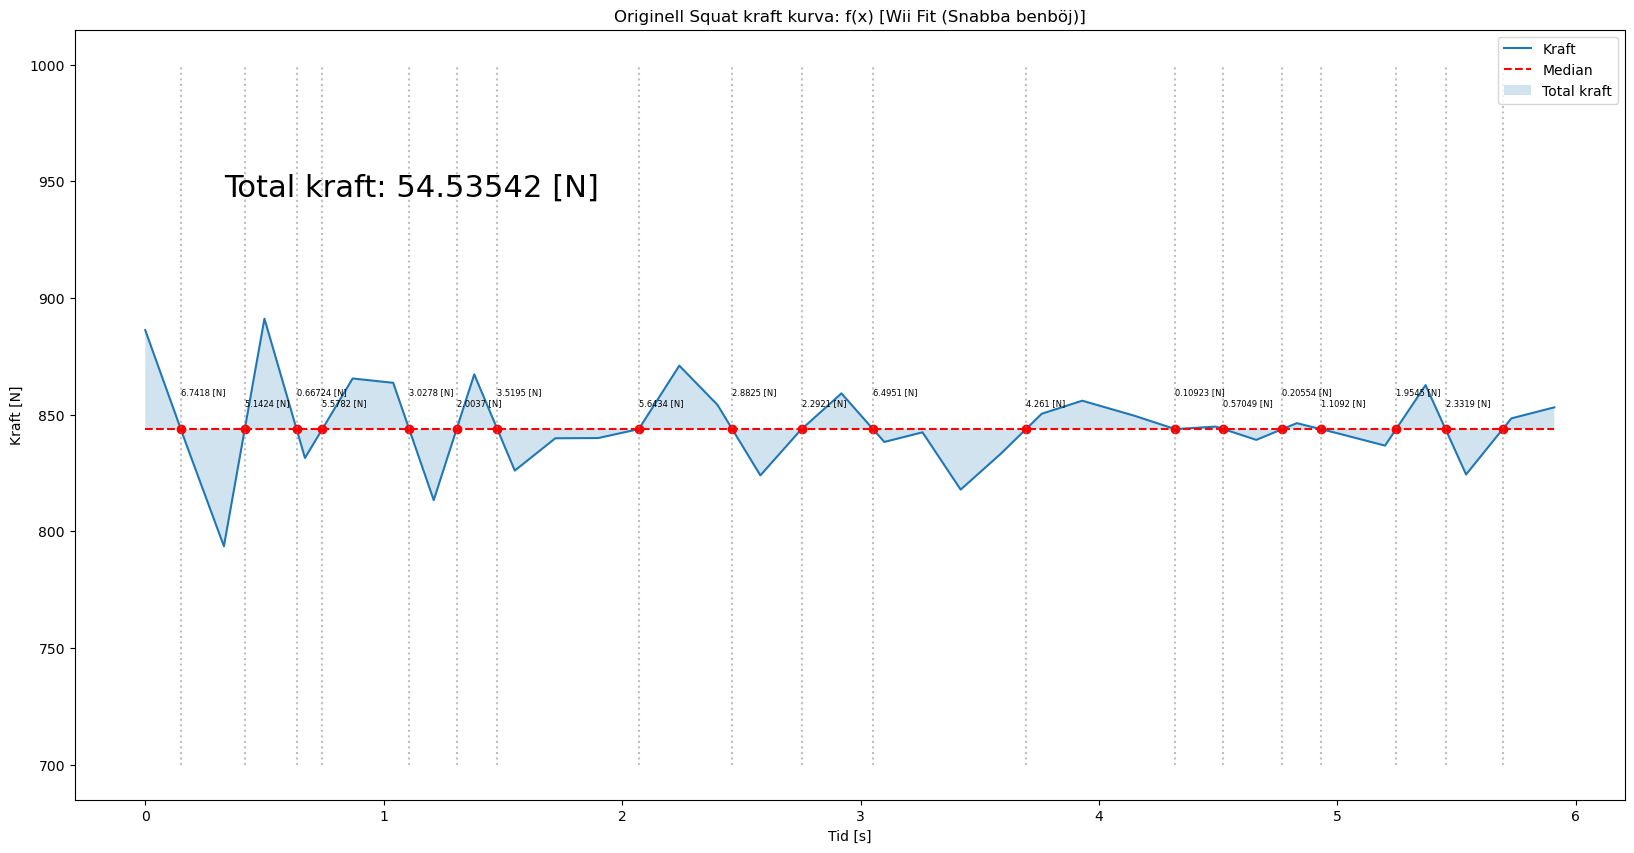

In [260]:
import numpy as np
import matplotlib.pyplot as plt

def getAndShowSurfaceOfDFWithMedian(dataframe, toRange, title):

    snippetOfGraph = dataframe[0:toRange]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].median(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Median")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    #ax1.grid()
    ax1.set_title(f"Originell Squat kraft kurva: f(x) [{title}]")


    from shapely.geometry import LineString

    medianArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].median())

    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((medianArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    intersection.geoms

    time = []
    force = []
    for geom in intersection.geoms:
        if(type(geom) == LineString):
            for coord in geom.coords:
                time.append(coord[1])
                force.append(coord[0])
        else:    
            time.append(geom.y)
            force.append(geom.x)
    
    #ax1.plot(time, force, 'ro')
    #ax1.vlines(ymax=1000, ymin=700, x=time, linestyles="dotted", colors="gray", alpha=0.5)
    #ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Sortera time och force listorna.
    sortedTime = []

    sortedForce = []

    i = 0


    while(len(time) != 0):
        i = time.index(min(time))
        sortedTime.append(min(time))    
        sortedForce.append(force[i])
        
        time.pop(i)
        force.pop(i)
        
    ax1.plot(sortedTime, sortedForce, 'ro')
    ax1.vlines(ymax=1000, ymin=700, x=sortedTime, linestyles="dotted", colors="gray", alpha=0.5)
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].median(), label="Total kraft", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Integrera mellan de givna punkterna
    sumForce = 0
    pos = 0
    spacer = 1
    while(pos < len(sortedTime)):
        # Skapa scliecs av force och time variablerna
        if(pos == len(sortedTime)-1):
            break
        
        timeSlice = []
        forceSlice = []
        
        # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
        timeSlice.append(sortedTime[pos])
        forceSlice.append(sortedForce[pos])



        # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
        i = 0
        while(True):
            # Lägg till de värden som kommer imellan de två 'intersections' som finns.
            if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
                i = i + 1
                continue
            if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
                break

            timeSlice.append(snippetOfGraph['time'][i])
            forceSlice.append(snippetOfGraph['force'][i])
            i = i + 1
            
        
        timeSlice.append(sortedTime[pos+1])
        forceSlice.append(sortedForce[pos+1])
        
        #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
        

        # Utför en integral med cumulative_trapezoid    
        sliceIntegral1 = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
        sliceIntegral2 = cumulative_trapezoid(y=np.full(len(forceSlice), fill_value=snippetOfGraph['force'].median()), x=timeSlice, initial=0)        
        diff = sliceIntegral1[len(sliceIntegral1) - 1] - sliceIntegral2[len(sliceIntegral2) - 1] 
        
        if(diff < 0):
            diff = diff * -1
        
        #print(f"Integral values: {sliceIntegral}")
        #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


        # Ta det sista värdet i arreyen som funktionen returnarar.
        # Som sist addera integralvärdet till en summa.
        ax1.text(sortedTime[pos], snippetOfGraph['force'].median() + 10 + 5 * spacer, f'{diff:.5} [N]', fontsize = 6)
        sumForce = sumForce + diff
        if(spacer == 1):
            spacer = 0
        else:
            spacer = 1
            
        # Gå till nästa punkt.
        pos = pos + 1

    ax1.text(snippetOfGraph['time'][2], snippetOfGraph['force'].median() + 100, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)

    ax1.legend()
    plt.show()

getAndShowSurfaceOfDFWithMedian(unitySlowDF, 40, "Unity (Sakta benböj)")
#getAndShowSurfaceOfDFWithMedian(unityFastDF, 40, "Unity (Snabba benböj)")


getAndShowSurfaceOfDFWithMedian(wiiFitSlowDF, 40, "Unity (Sakta benböj)")
getAndShowSurfaceOfDFWithMedian(wiiFitFastDF, 35, "Wii Fit (Snabba benböj)")



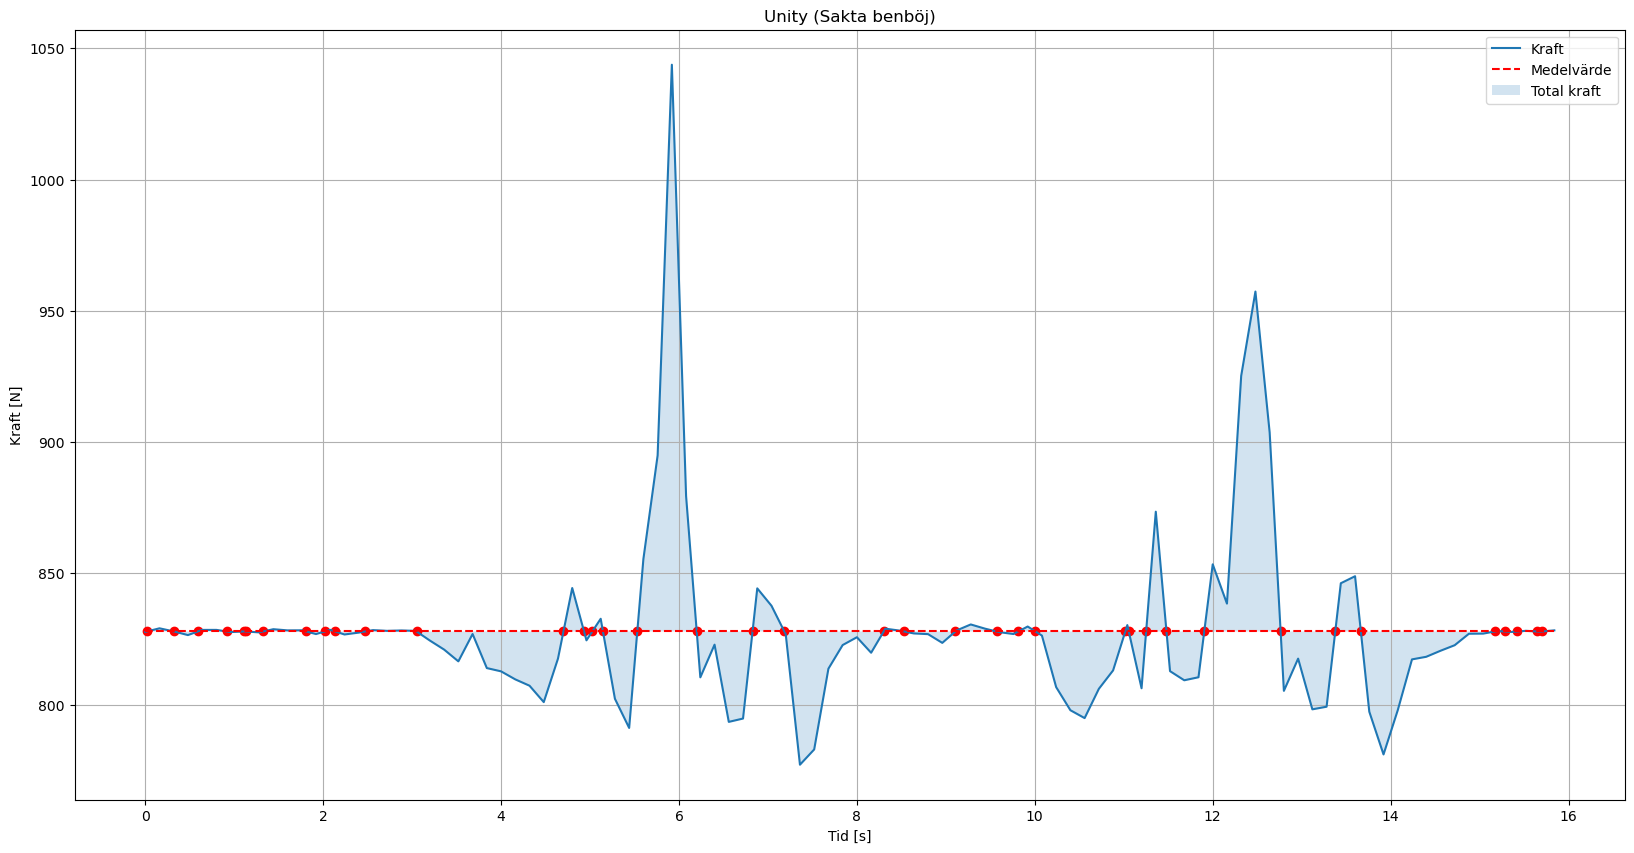

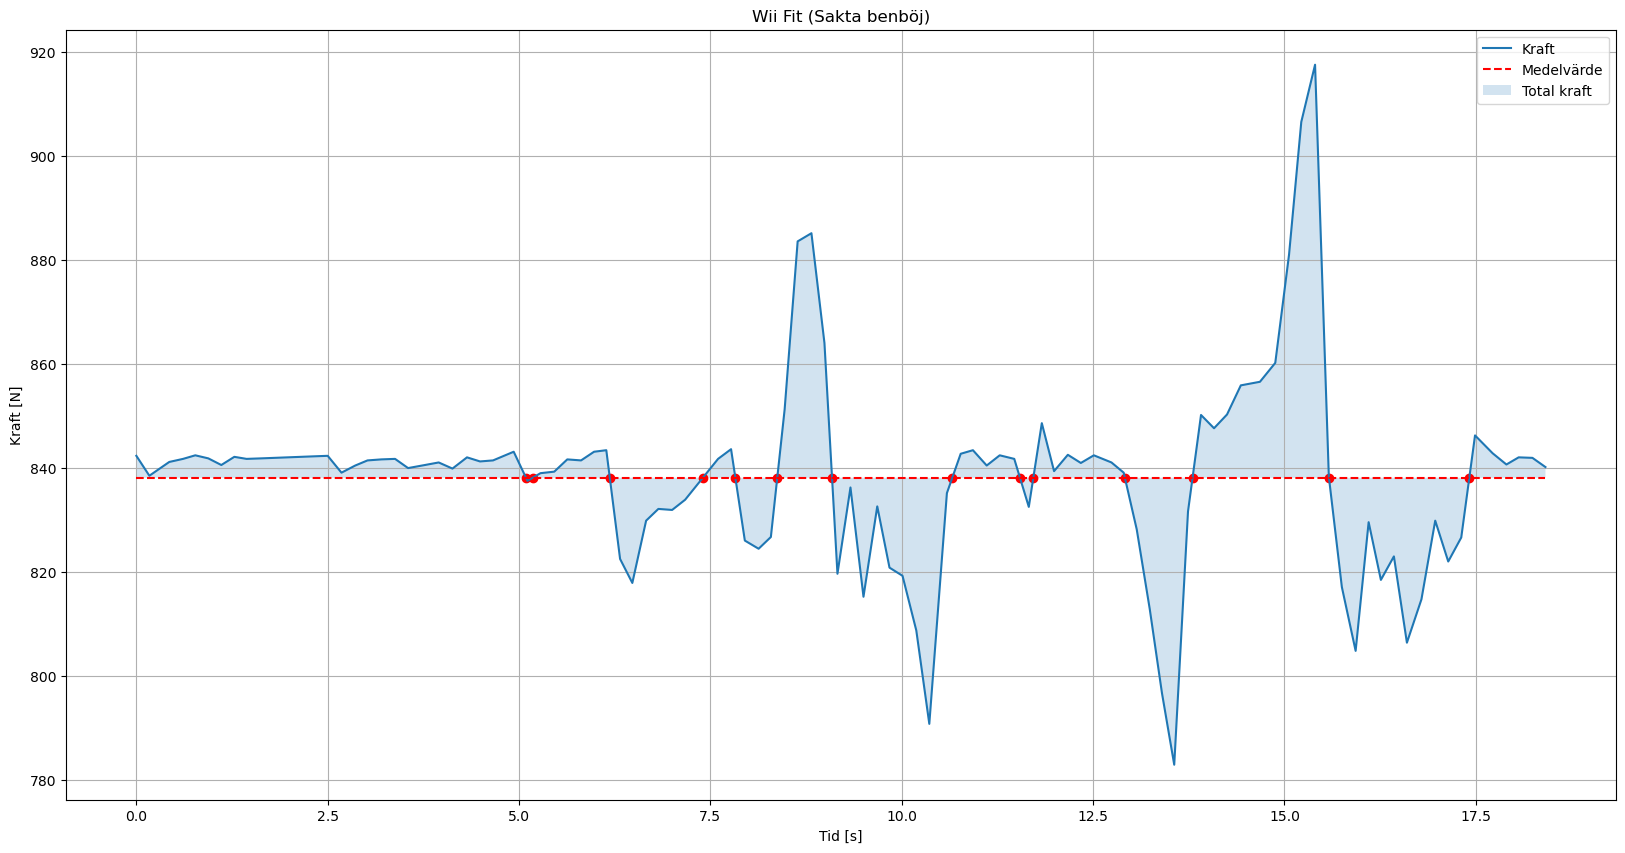

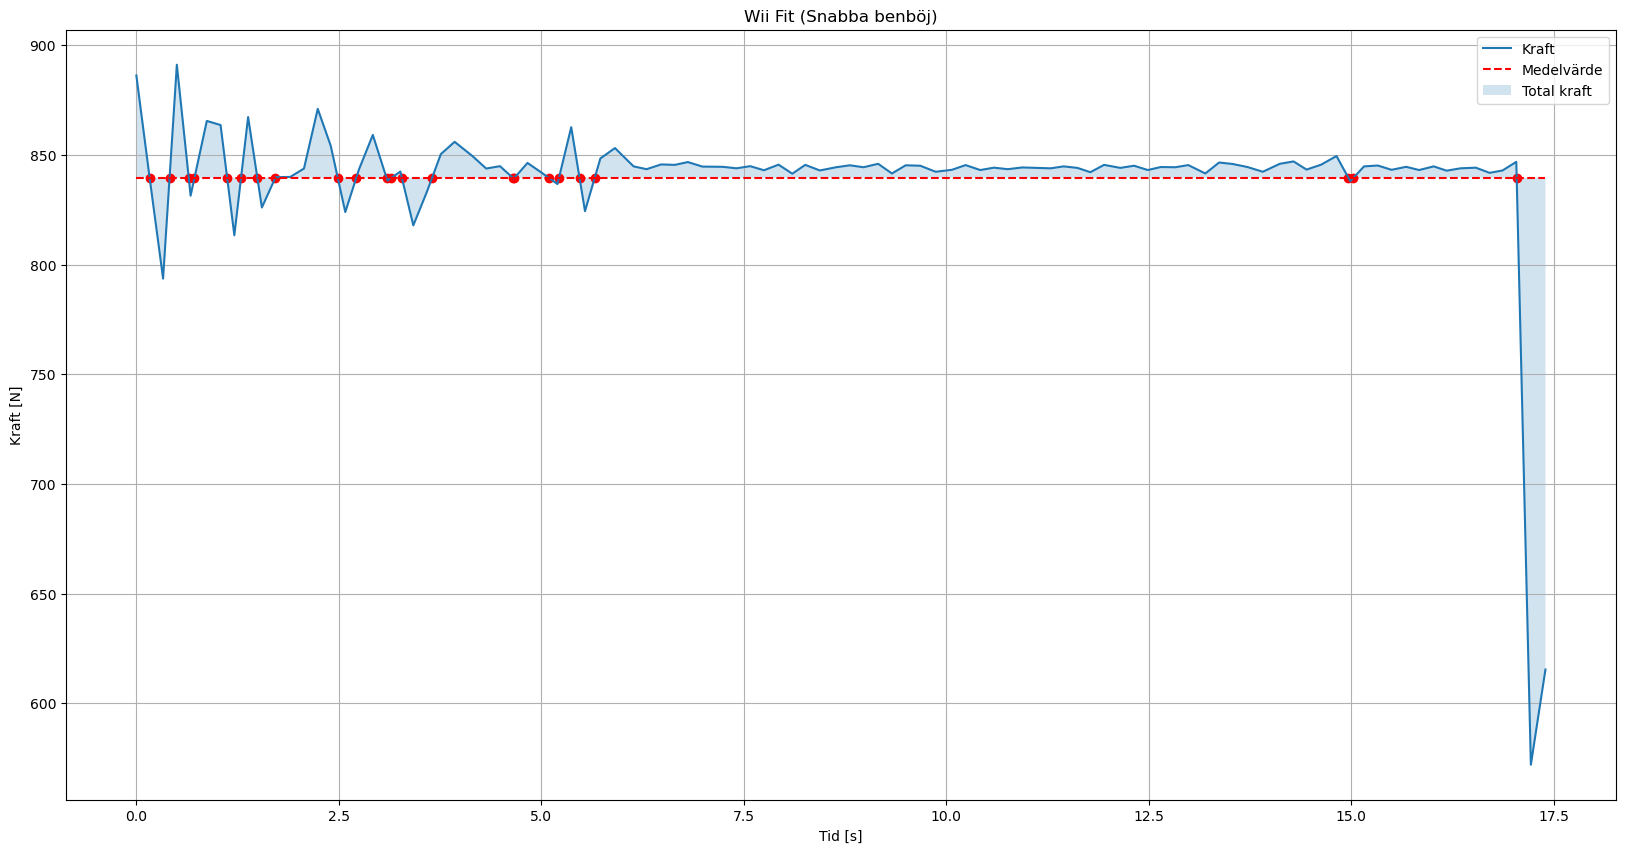

In [261]:


def plotSimpleGraphWithShading(df, rangeTo, title):
    from shapely.geometry import LineString

    snippetOfGraph = df[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    meanArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].mean())

    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((meanArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    #intersection.geoms
    time = []
    force = []
    for geom in intersection.geoms:
        if(type(geom) == LineString):
            for coord in geom.coords:
                time.append(coord[1])
                force.append(coord[0])
        else:    
            time.append(geom.y)
            force.append(geom.x)
    
    ax1.plot(time, force, 'ro')


    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].mean(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medelvärde")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].mean(), label="Total kraft", alpha=0.2)
    ax1.set_title(title)
    ax1.legend()
    ax1.grid()

    plt.show()
    
plotSimpleGraphWithShading(unitySlowDF, 100, "Unity (Sakta benböj)")
#plotSimpleGraphWithShading(unityFastDF, 100, "Unity (Snabba benböj)")

plotSimpleGraphWithShading(wiiFitSlowDF, 100, "Wii Fit (Sakta benböj)")
plotSimpleGraphWithShading(wiiFitFastDF, 100, "Wii Fit (Snabba benböj)")


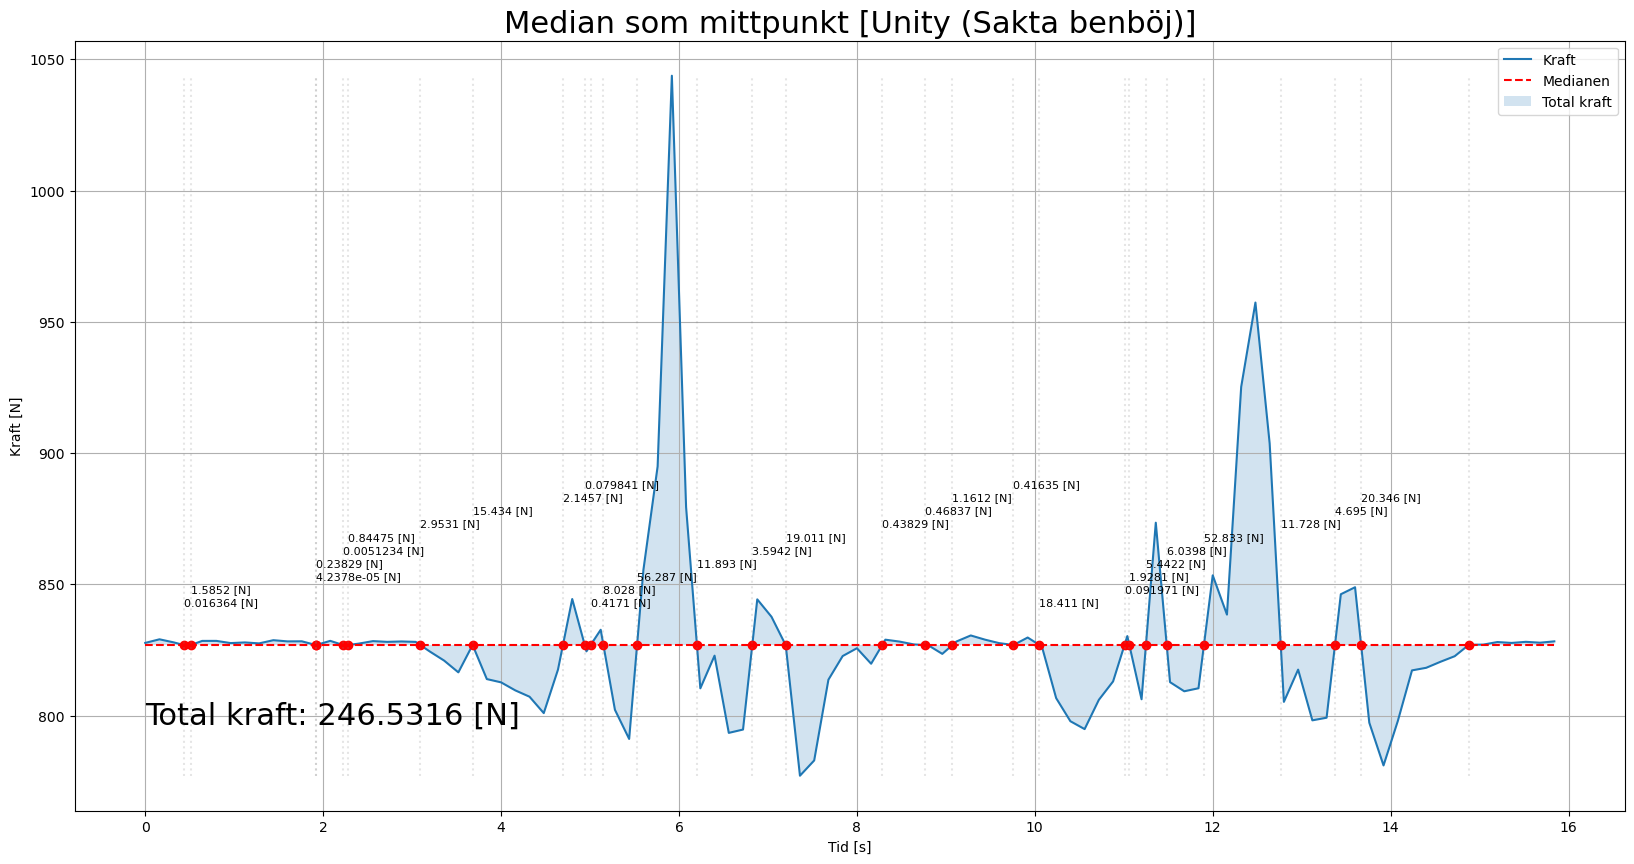

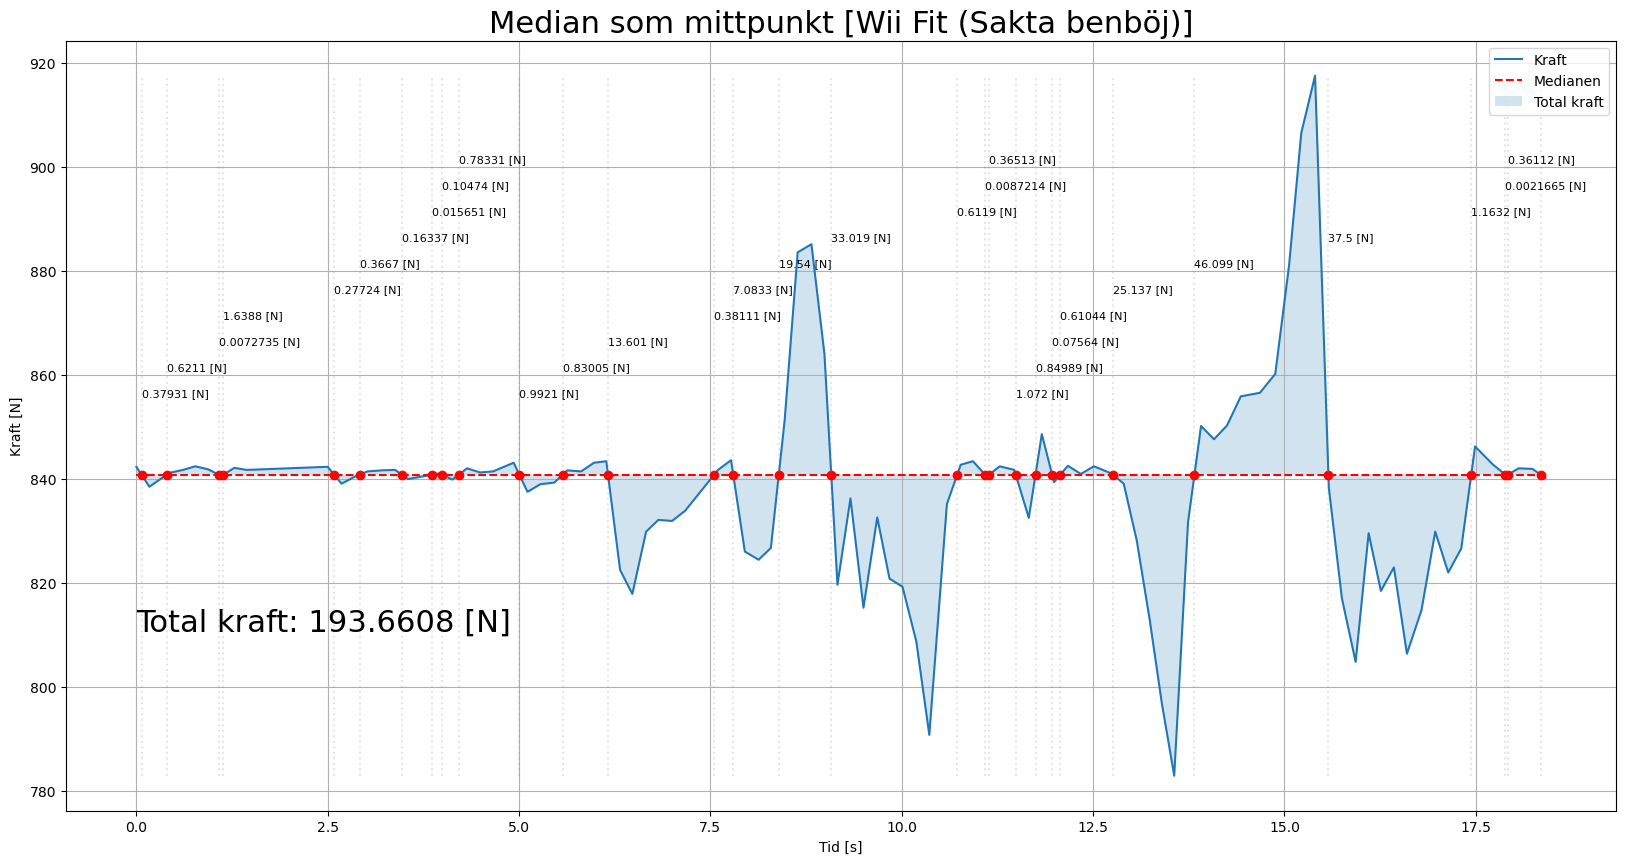

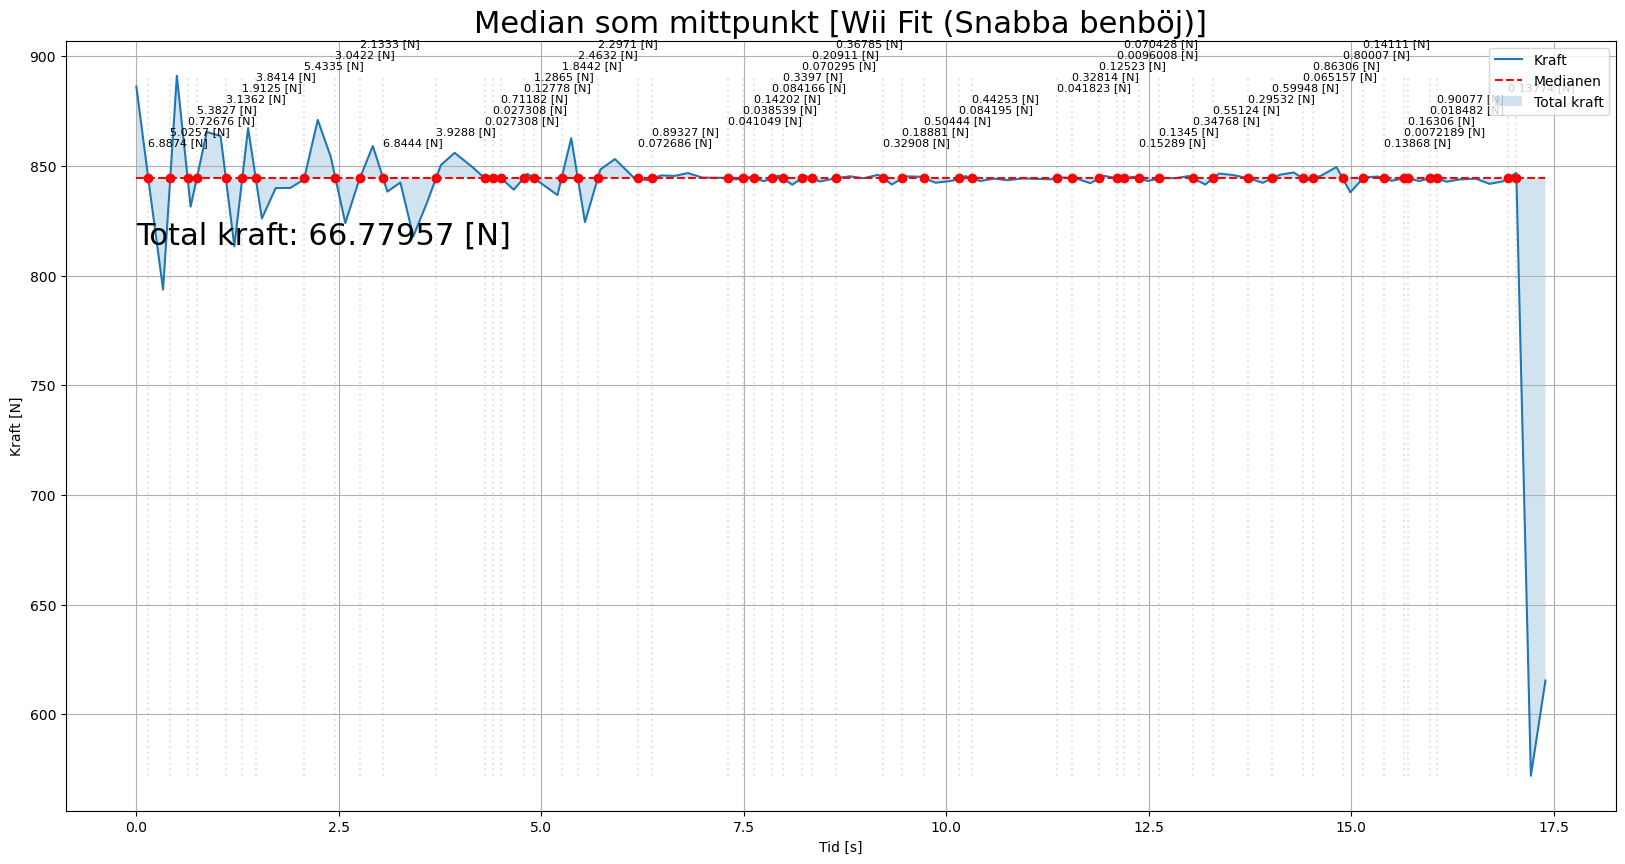

In [267]:


def integrateDFwithMedian(dataframe, title, rangeTo):
    from shapely.geometry import LineString
    
    snippetOfGraph = dataframe[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    medianArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].median())


    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((medianArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    #intersection.geoms
    time = []
    force = []
    for geom in intersection.geoms:
        if(type(geom) == LineString):
            for coord in geom.coords:
                time.append(coord[1])
                force.append(coord[0])
        else:    
            time.append(geom.y)
            force.append(geom.x)


    ## Bytte mittenlinjen till median istället för mean för att testa
    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].median(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medianen")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].median(), label="Total kraft", alpha=0.2)
    ax1.grid()
    ax1.set_title(f"Median som mittpunkt [{title}]", fontsize=22)



    # Sortera time och force listorna.
    sortedTime = []

    sortedForce = []

    i = 0


    while(len(time) != 0):
        i = time.index(min(time))
        sortedTime.append(min(time))    
        sortedForce.append(force[i])
        
        time.pop(i)
        force.pop(i)
        
    ax1.plot(sortedTime, sortedForce, 'ro')
    ax1.vlines(ymax=snippetOfGraph['force'].max(), ymin=snippetOfGraph['force'].min(), x=sortedTime, linestyles="dotted", colors="gray", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Integrera mellan de givna punkterna
    sumForce = 0
    pos = 0
    spacer = 1
    while(pos < len(sortedTime)):
        # Skapa scliecs av force och time variablerna
        if(pos == len(sortedTime)-1):
            break
        
        timeSlice = []
        forceSlice = []
        
        # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
        timeSlice.append(sortedTime[pos])
        forceSlice.append(sortedForce[pos])



        # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
        i = 0
        while(True):
            # Lägg till de värden som kommer imellan de två 'intersections' som finns.
            if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
                i = i + 1
                continue
            if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
                break

            timeSlice.append(snippetOfGraph['time'][i])
            forceSlice.append(snippetOfGraph['force'][i])
            i = i + 1
            
        
        timeSlice.append(sortedTime[pos+1])
        forceSlice.append(sortedForce[pos+1])
        
        #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
        

        # Utför en integral med cumulative_trapezoid    
        # Utför en integral med cumulative_trapezoid    
        sliceIntegral1 = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
        sliceIntegral2 = cumulative_trapezoid(y=np.full(len(forceSlice), fill_value=snippetOfGraph['force'].median()), x=timeSlice, initial=0)        
        diff = sliceIntegral1[len(sliceIntegral1) - 1] - sliceIntegral2[len(sliceIntegral2) - 1] 
        
        if(diff < 0):
            diff = diff * -1
        #print(f"Integral values: {sliceIntegral}")
        #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


        # Ta det sista värdet i arreyen som funktionen returnarar.
        # Som sist addera integralvärdet till en summa.
        ax1.text(sortedTime[pos], snippetOfGraph['force'].median() + 10 + 5 * spacer, f'{diff:.5} [N]', fontsize = 8)
        sumForce = sumForce + diff
        
        if(spacer%10 == 0):
            spacer = 1
        else:
            spacer = spacer + 1
            
        # Gå till nästa punkt.
        pos = pos + 1

    ax1.text(0, snippetOfGraph['force'].median() - 30, f'Total kraft: {sumForce:.7} [N]', fontsize = 22)

    ax1.legend()
    plt.show()

integrateDFwithMedian(unitySlowDF, "Unity (Sakta benböj)", 100)
#integrateDFwithMedian(unityFastDF, "Unity (Snabba benböj)", 80)

integrateDFwithMedian(wiiFitSlowDF, "Wii Fit (Sakta benböj)", 100)
integrateDFwithMedian(wiiFitFastDF, "Wii Fit (Snabba benböj)", 100)



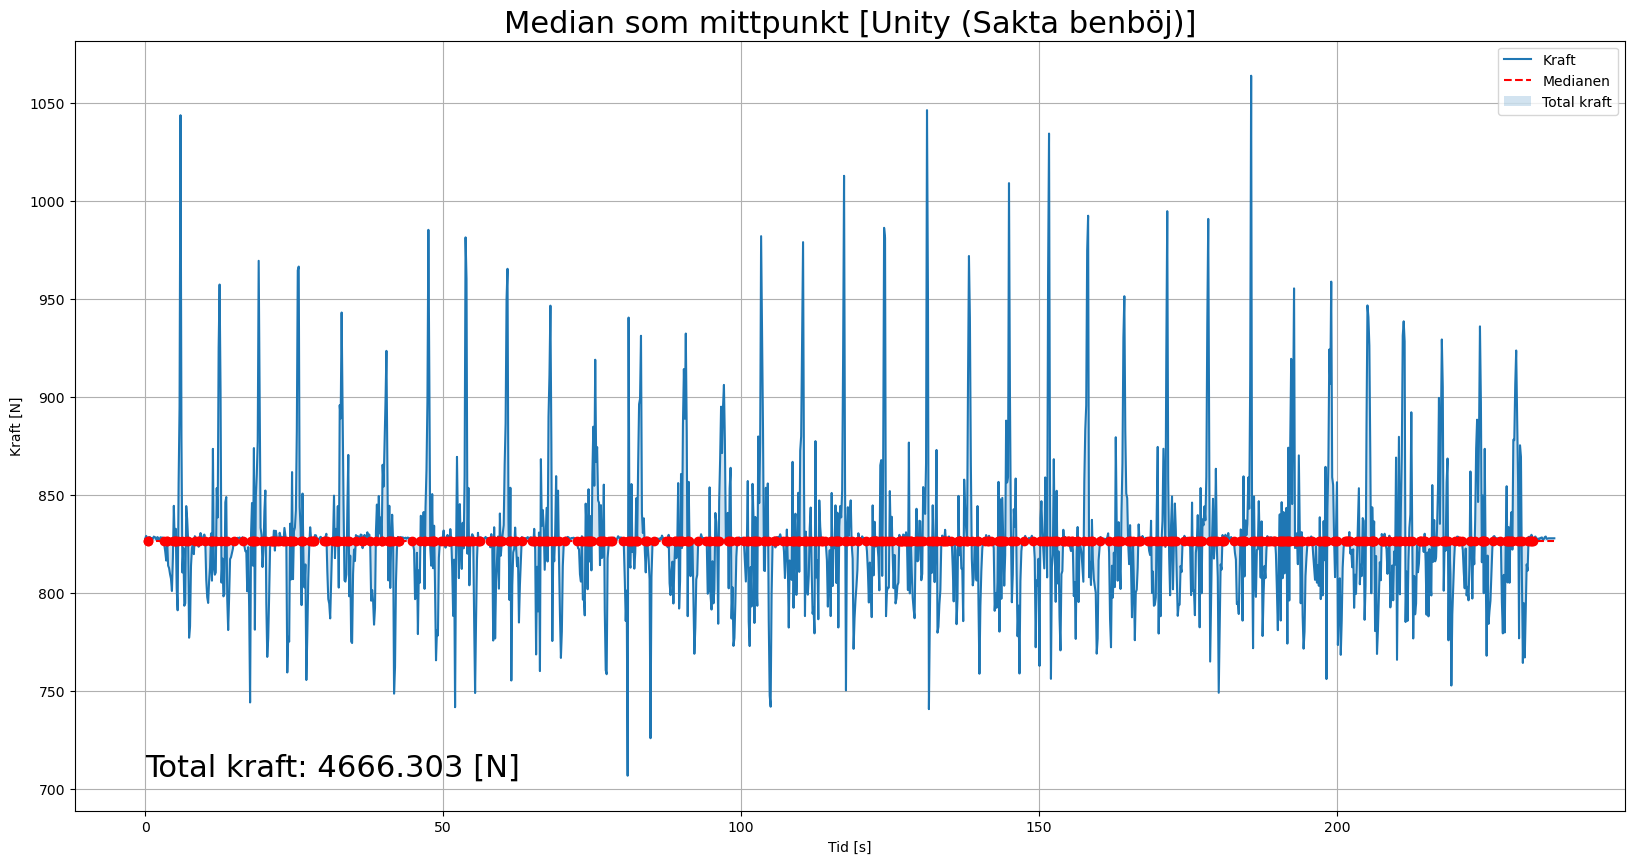

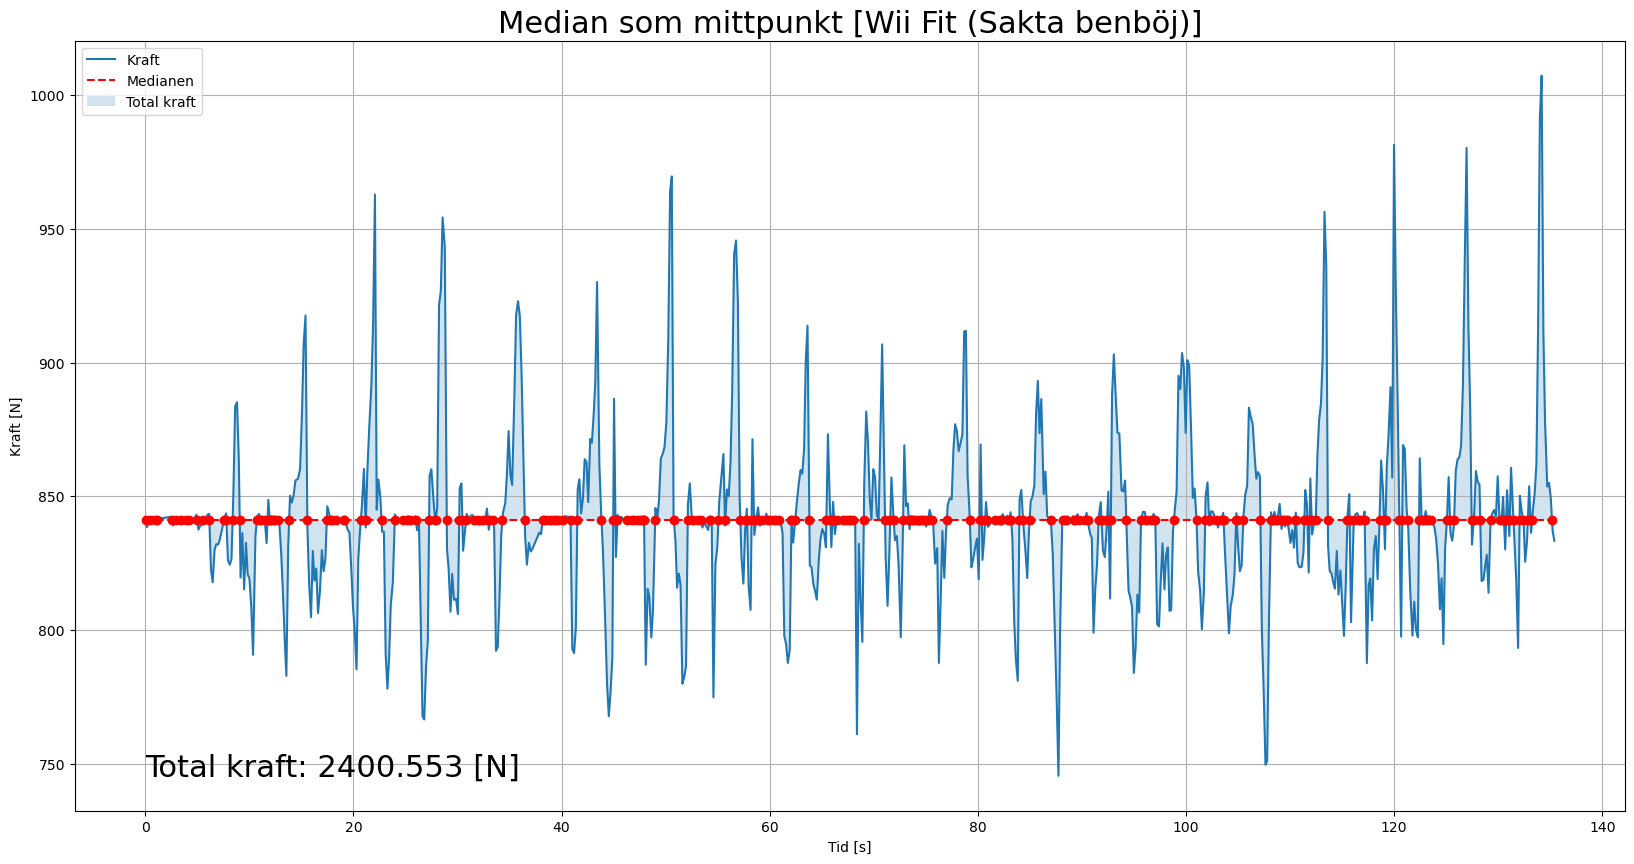

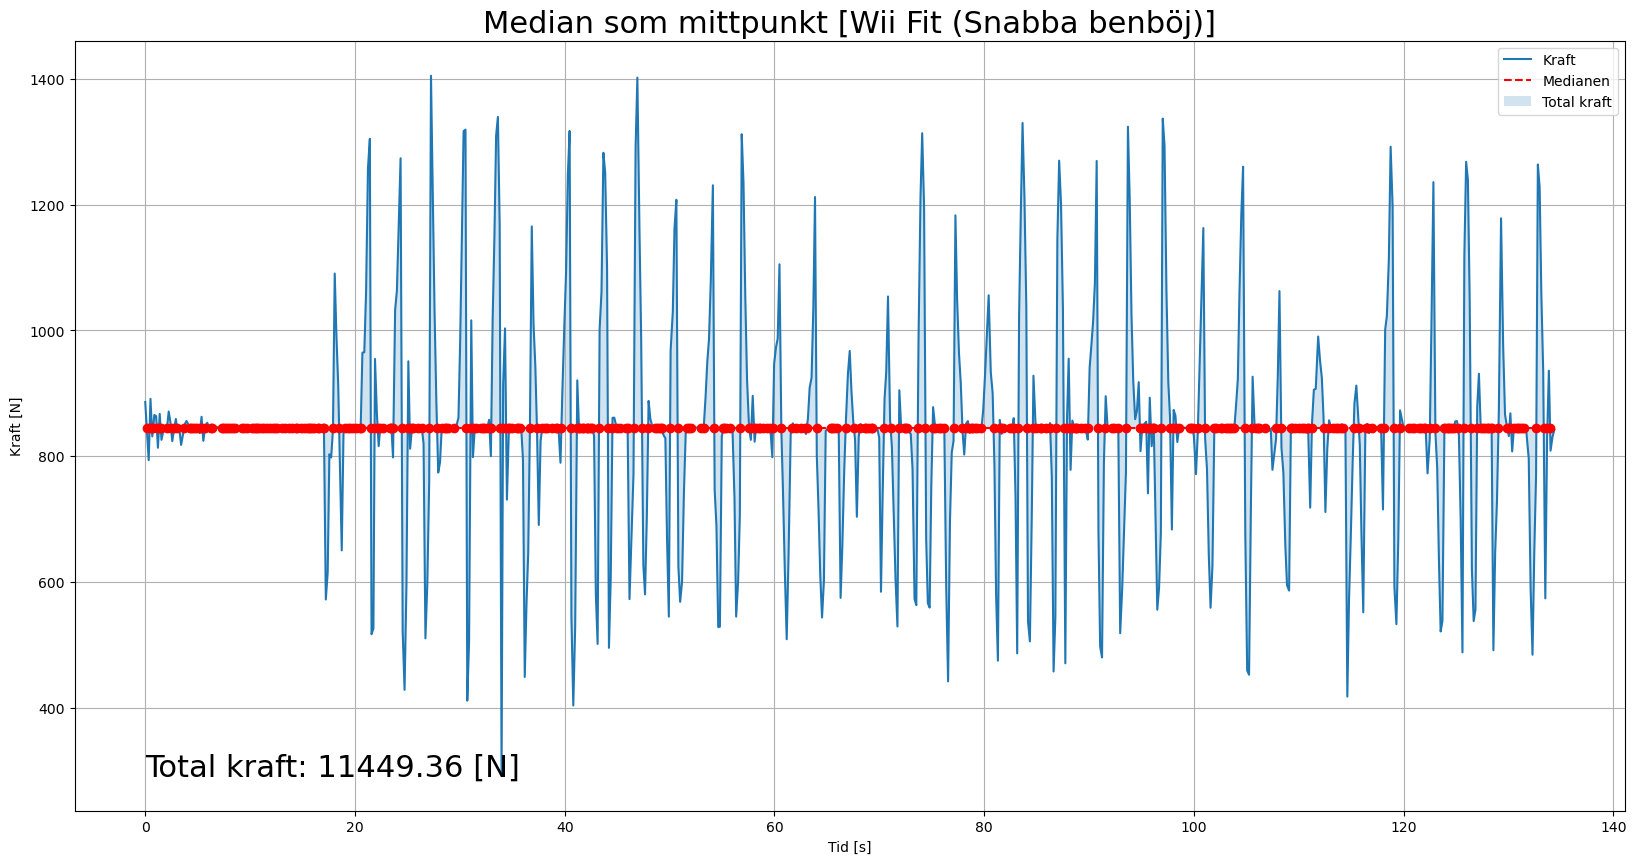

In [268]:


def integrateDFwithMedian(dataframe, title, rangeTo, showText, showLines):
    from shapely.geometry import LineString
    snippetOfGraph = dataframe[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    medianArr = np.full(snippetOfGraph['force'].shape[0], snippetOfGraph['force'].median())


    line_1 = LineString(np.column_stack((snippetOfGraph['force'],snippetOfGraph['time'])))
    line_2 = LineString(np.column_stack((medianArr,snippetOfGraph['time'])))

    intersection = line_1.intersection(line_2)

    #intersection.geoms
    time = []
    force = []
    for geom in intersection.geoms:
        if(type(geom) == LineString):
            for coord in geom.coords:
                time.append(coord[1])
                force.append(coord[0])
        else:    
            time.append(geom.y)
            force.append(geom.x)


    ## Bytte mittenlinjen till median istället för mean för att testa
    ax1.plot(snippetOfGraph['time'], snippetOfGraph['force'], label="Kraft")
    ax1.hlines(y=snippetOfGraph['force'].median(), colors=['red'], linestyles=['dashed'], xmin=snippetOfGraph['time'][0], xmax=snippetOfGraph['time'][snippetOfGraph.shape[0]-1], label="Medianen")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.fill_between(snippetOfGraph['time'], snippetOfGraph['force'], snippetOfGraph['force'].median(), label="Total kraft", alpha=0.2)
    ax1.grid()
    ax1.set_title(f"Median som mittpunkt [{title}]", fontsize=22)



    # Sortera time och force listorna.
    sortedTime = []

    sortedForce = []

    i = 0


    while(len(time) != 0):
        i = time.index(min(time))
        sortedTime.append(min(time))    
        sortedForce.append(force[i])
        
        time.pop(i)
        force.pop(i)
        
    ax1.plot(sortedTime, sortedForce, 'ro')
    if(showLines == True):
        ax1.vlines(ymax=snippetOfGraph['force'].max(), ymin=snippetOfGraph['force'].min(), x=sortedTime, linestyles="dotted", colors="gray", alpha=0.2)
    #ax1.fill_betweenx(y=np.arange(snippetOfGraph['force'].min(),snippetOfGraph['force'].max(),0.1), x1=time[0], x2=time[1], alpha=0.2, color="gray")


    # Integrera mellan de givna punkterna
    sumForce = 0
    pos = 0
    spacer = 1
    while(pos < len(sortedTime)):
        # Skapa scliecs av force och time variablerna
        if(pos == len(sortedTime)-1):
            break
        
        timeSlice = []
        forceSlice = []
        
        # Första värdet och sista värdet blir givet av sortedTime & sortedForce vilket är där linjerna korsar varann
        timeSlice.append(sortedTime[pos])
        forceSlice.append(sortedForce[pos])



        # Lägg in värden av snippetOfGraph['force] & snippetOfGraph['time'] i slices
        i = 0
        while(True):
            # Lägg till de värden som kommer imellan de två 'intersections' som finns.
            if(snippetOfGraph['time'][i] == sortedTime[pos] or snippetOfGraph['time'][i] < sortedTime[pos]):
                i = i + 1
                continue
            if(snippetOfGraph['time'][i] == sortedTime[pos + 1] or snippetOfGraph['time'][i] > sortedTime[pos + 1]):
                break

            timeSlice.append(snippetOfGraph['time'][i])
            forceSlice.append(snippetOfGraph['force'][i])
            i = i + 1
            
        
        timeSlice.append(sortedTime[pos+1])
        forceSlice.append(sortedForce[pos+1])
        
        #print(f"timeSlice (pos {pos} - {pos + 1}): {timeSlice}")
        

        # Utför en integral med cumulative_trapezoid    
        # Utför en integral med cumulative_trapezoid    
        sliceIntegral1 = cumulative_trapezoid(y=forceSlice, x=timeSlice, initial=0)
        sliceIntegral2 = cumulative_trapezoid(y=np.full(len(forceSlice), fill_value=snippetOfGraph['force'].median()), x=timeSlice, initial=0)        
        diff = sliceIntegral1[len(sliceIntegral1) - 1] - sliceIntegral2[len(sliceIntegral2) - 1] 
        
        if(diff < 0):
            diff = diff * -1
        #print(f"Integral values: {sliceIntegral}")
        #print(f"Integral value: {sliceIntegral[len(sliceIntegral)-1]} [N]\n")


        # Ta det sista värdet i arreyen som funktionen returnarar.
        # Som sist addera integralvärdet till en summa.
        if(showText):
            ax1.text(sortedTime[pos], snippetOfGraph['force'].median() + 10 + 20 * spacer, f'{diff:.5} [N]', fontsize = 8)
        sumForce = sumForce + diff
        
        if(spacer%10 == 0):
            spacer = 1
        else:
            spacer = spacer + 1
            
        # Gå till nästa punkt.
        pos = pos + 1

    ax1.text(0, snippetOfGraph['force'].min(), f'Total kraft: {sumForce:.7} [N]', fontsize = 22)

    ax1.legend()
    plt.show()

integrateDFwithMedian(unitySlowDF, "Unity (Sakta benböj)", unitySlowDF['time'].shape[0], False, False)
#integrateDFwithMedian(unityFastDF, "Unity (Snabba benböj)", unityFastDF['time'].shape[0], False, False)


integrateDFwithMedian(wiiFitSlowDF, "Wii Fit (Sakta benböj)", 760, False, False)
integrateDFwithMedian(wiiFitFastDF, "Wii Fit (Snabba benböj)", 760, False, False)



## Lokal maximi och minipunkter för var benböjs beräkning.

För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.  
y = kx + m => k = Δy / Δx => k = y2- y1 / x2 - x1

[[Källa]](https://stackoverflow.com/questions/69000410/extract-and-plot-the-first-derivative-of-a-curve-in-python-without-knowing-its-f)

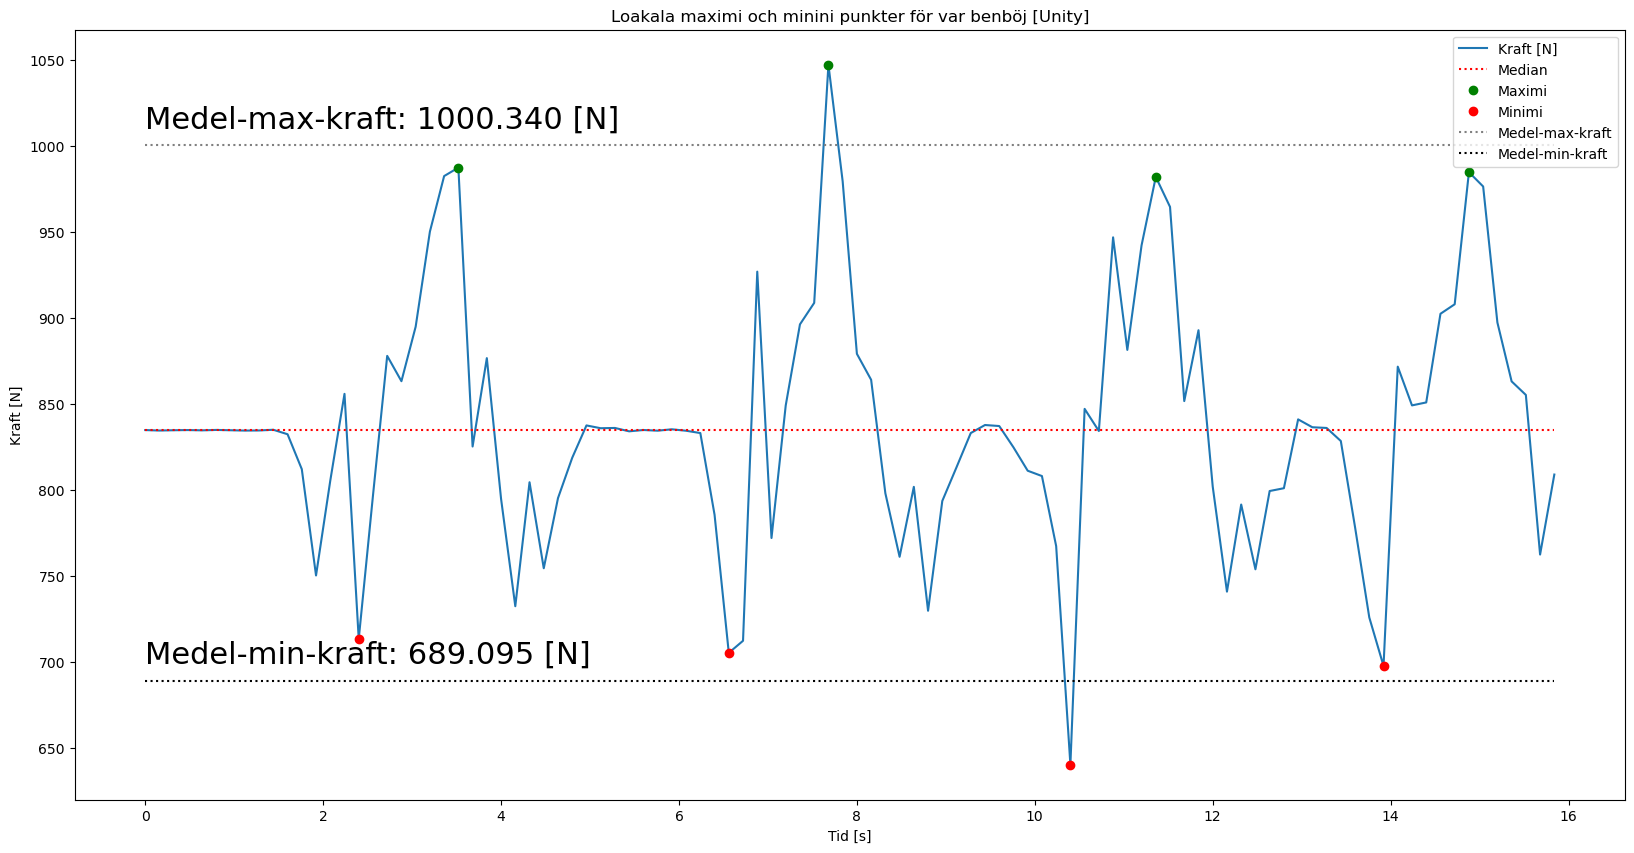

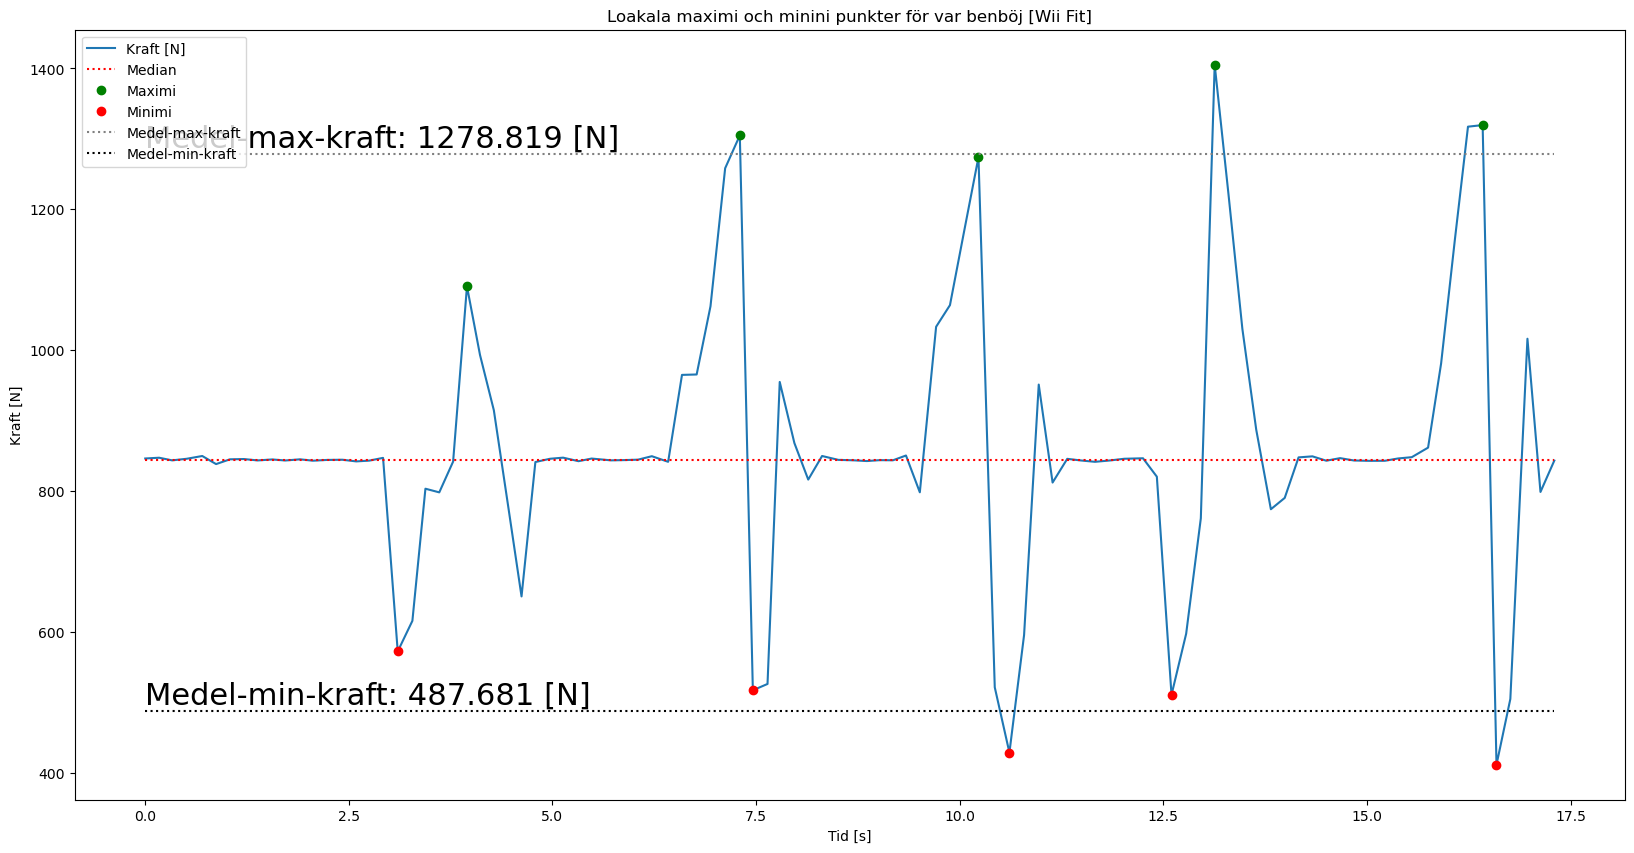

In [227]:
def showMaximaAndMinimaForDataframe(dataframe, rangeTo, title, nrOfSquats):
    sliceOfData = dataframe[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(sliceOfData['time'], sliceOfData['force'], label="Kraft [N]")
    ax1.set_title(f"Loakala maximi och minini punkter för var benböj [{title}]")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.hlines(y=sliceOfData['force'].median(), xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyle="dotted", color="red", label="Median")


    ## För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.
    ## delta y / delta x.

    #difference = sliceOfData.diff()
    #derivative = difference.eval('force/time')
    #ax1.plot(sliceOfData['time'], derivative, 'ro', label="derivative")
    #ax1.vlines(sliceOfData['time'], derivative, colors="gray", alpha=0.5, ymax=1500, linestyles="dotted")
    #ax1.hlines(y=0, xmin=0, xmax=16, colors="gray", alpha=0.5)




    localMaximaForce = []
    localMaximaTime = []

    localMinimaForce = []
    localMinimaTime = []


    i = 1
    while(i < sliceOfData['force'].shape[0]):
        if(i == sliceOfData['force'].shape[0] - 1):
            break

        if(sliceOfData['force'][i] > sliceOfData['force'][i+1] and sliceOfData['force'][i] > sliceOfData['force'][i-1]):
            localMaximaForce.append(sliceOfData['force'][i])
            localMaximaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        if(sliceOfData['force'][i] < sliceOfData['force'][i+1] and sliceOfData['force'][i] < sliceOfData['force'][i-1]):
            localMinimaForce.append(sliceOfData['force'][i])
            localMinimaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        i = i + 1


    #ax1.plot(localMaximaTime,localMaximaForce, 'go', label="Maximi")
    #ax1.plot(localMinimaTime,localMinimaForce, 'ro', label="Minimi")

    # Sortera efter storlek
    # Ta ut de 31 största.
    # Markera
    # Gör samma sak med minimi.
    #nrOfSquats = 4


    #Maximi
    dataMaxima = {
        "maxima":localMaximaForce,
        "time":localMaximaTime
    }

    dataframeMaxima = pd.DataFrame(data=dataMaxima)
    dataframeMaxima.sort_values(by="maxima", ascending=False, inplace=True)

    maximaForce = dataframeMaxima['maxima'][0:nrOfSquats]
    maximaTime = dataframeMaxima['time'][0:nrOfSquats]

    ax1.plot(maximaTime,maximaForce, 'go', label="Maximi")

    #Minimi
    dataMinima = {
        "minima":localMinimaForce,
        "time":localMinimaTime
    }

    dataframeMinima = pd.DataFrame(data=dataMinima)
    dataframeMinima.sort_values(by="minima", ascending=True, inplace=True)

    minimaForce = dataframeMinima['minima'][0:nrOfSquats]
    minimaTime = dataframeMinima['time'][0:nrOfSquats]

    ax1.plot(minimaTime,minimaForce, 'ro', label="Minimi")

    averageMaxForce = maximaForce.mean()
    averageMinForce = minimaForce.mean()

    ax1.text(x=0, y=averageMaxForce + 10, s=f"Medel-max-kraft: {averageMaxForce:.3f} [N]", fontsize=22)
    ax1.text(x=0, y=averageMinForce + 10, s=f"Medel-min-kraft: {averageMinForce:.3f} [N]", fontsize=22)

    ax1.hlines(y=averageMaxForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-max-kraft", colors="gray")
    ax1.hlines(y=averageMinForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-min-kraft", colors="black" )



    ax1.legend()
    plt.show()
    
    return minimaForce, maximaForce

minimaForceUnity, maximaForceUnity = showMaximaAndMinimaForDataframe(dataframe=unityDF, rangeTo=100, title="Unity", nrOfSquats=4)
minimaForceWiiFit, maxmiaForceWiiFit = showMaximaAndMinimaForDataframe(dataframe=wiiFitDF, rangeTo=100, title="Wii Fit", nrOfSquats=5)



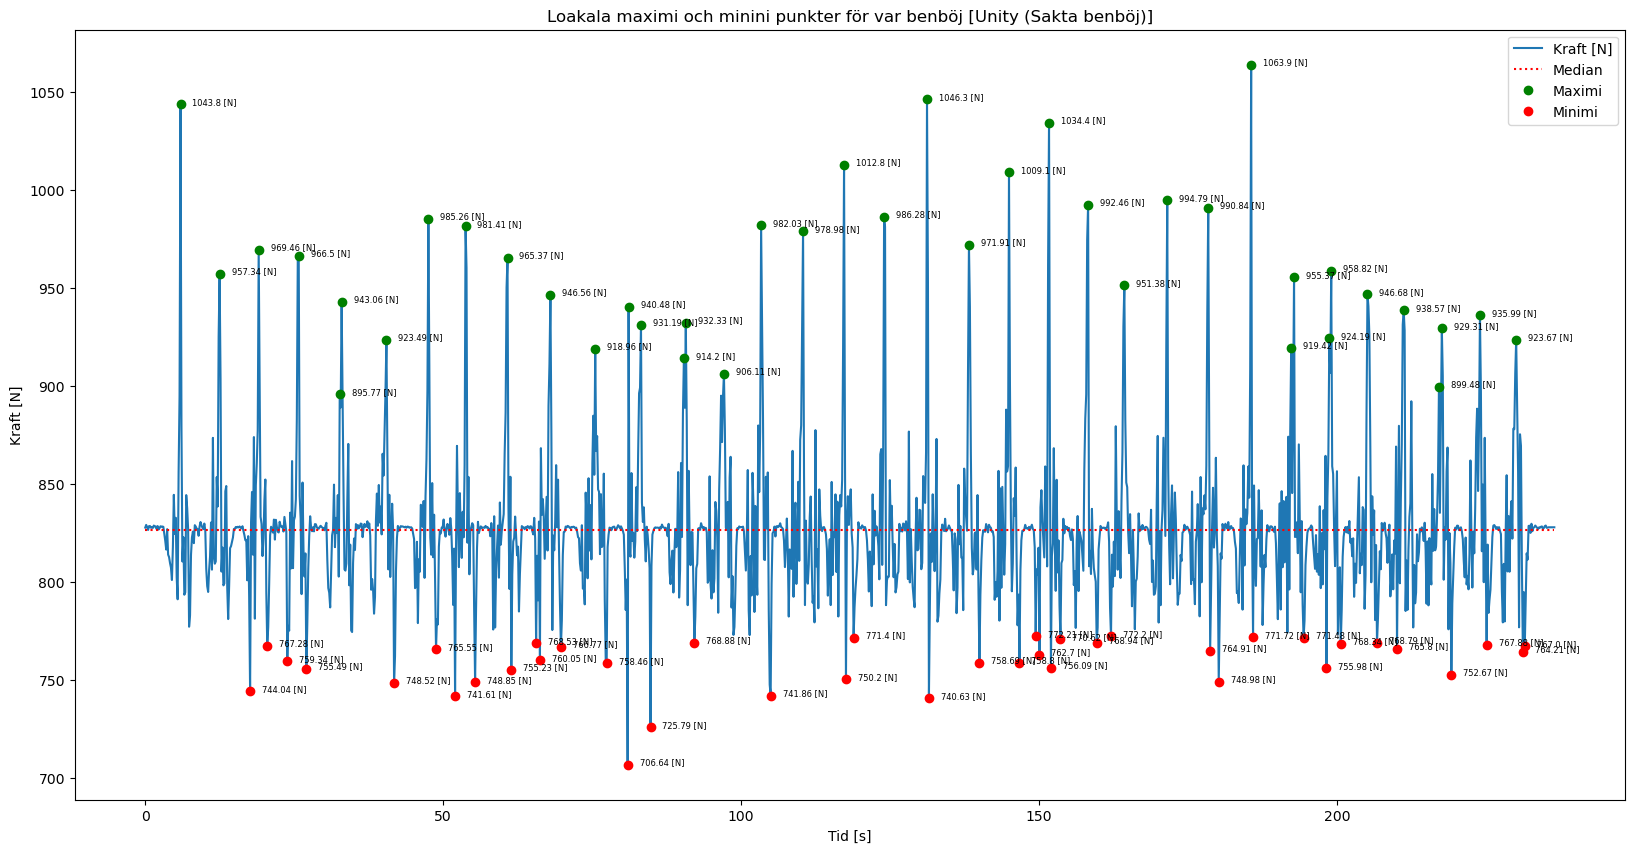

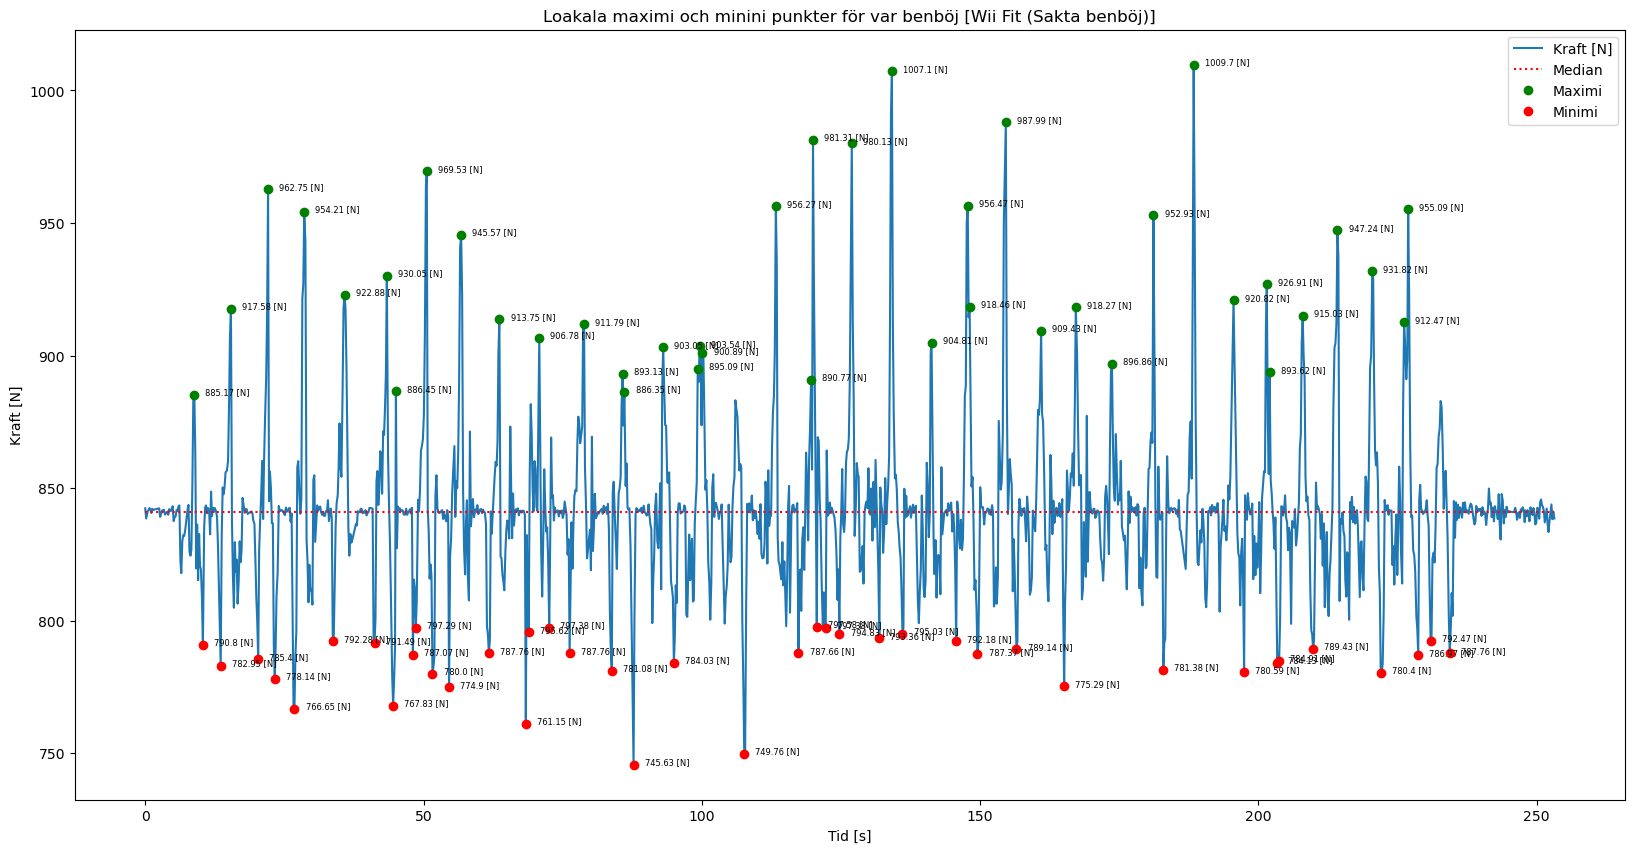

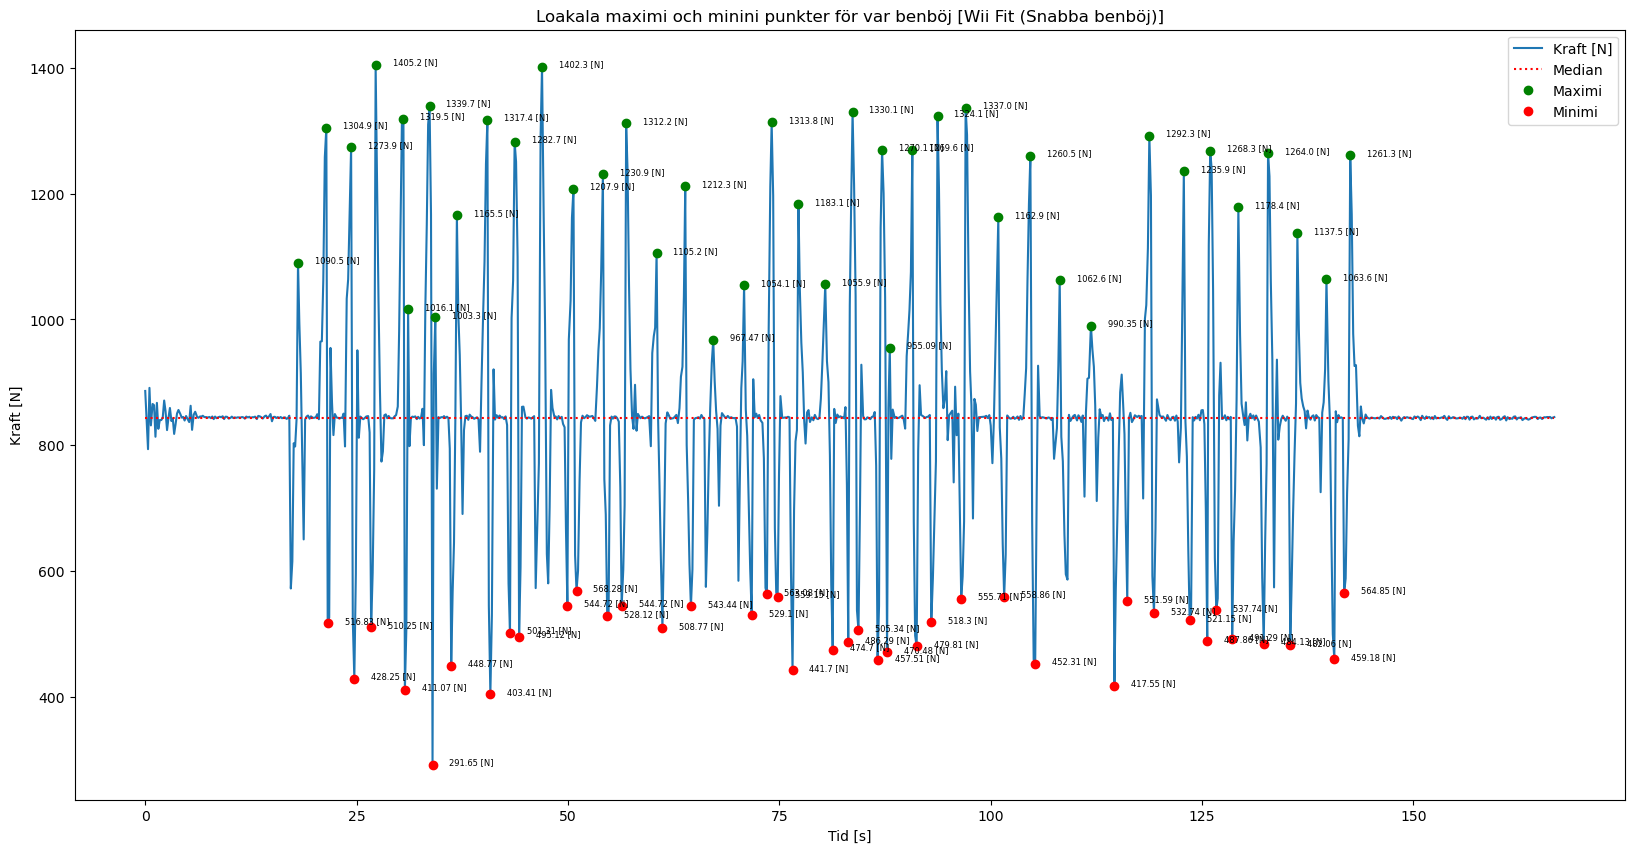

In [296]:
def showMaximaAndMinimaForDataframe(dataframe, rangeTo, title, nrOfSquats):
    sliceOfData = dataframe[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(sliceOfData['time'], sliceOfData['force'], label="Kraft [N]")
    ax1.set_title(f"Loakala maximi och minini punkter för var benböj [{title}]")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.hlines(y=sliceOfData['force'].median(), xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyle="dotted", color="red", label="Median")


    ## För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.
    ## delta y / delta x.

    #difference = sliceOfData.diff()
    #derivative = difference.eval('force/time')
    #ax1.plot(sliceOfData['time'], derivative, 'ro', label="derivative")
    #ax1.vlines(sliceOfData['time'], derivative, colors="gray", alpha=0.5, ymax=1500, linestyles="dotted")
    #ax1.hlines(y=0, xmin=0, xmax=16, colors="gray", alpha=0.5)




    localMaximaForce = []
    localMaximaTime = []

    localMinimaForce = []
    localMinimaTime = []


    i = 1
    while(i < sliceOfData['force'].shape[0]):
        if(i == sliceOfData['force'].shape[0] - 1):
            break

        if(sliceOfData['force'][i] > sliceOfData['force'][i+1] and sliceOfData['force'][i] > sliceOfData['force'][i-1]):
            localMaximaForce.append(sliceOfData['force'][i])
            localMaximaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        if(sliceOfData['force'][i] < sliceOfData['force'][i+1] and sliceOfData['force'][i] < sliceOfData['force'][i-1]):
            localMinimaForce.append(sliceOfData['force'][i])
            localMinimaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        i = i + 1


    #ax1.plot(localMaximaTime,localMaximaForce, 'go', label="Maximi")
    #ax1.plot(localMinimaTime,localMinimaForce, 'ro', label="Minimi")

    # Sortera efter storlek
    # Ta ut de 31 största.
    # Markera
    # Gör samma sak med minimi.
    #nrOfSquats = 4

    #ax1.plot(localMaximaTime,localMaximaForce, "ro", label="Lokal Maximi")
    #ax1.plot(localMinimaTime,localMinimaForce, "go", label="Lokal Minimi")

    data0 = {
        "time":localMaximaTime,
        "force":localMaximaForce,
        "maxima":True
    }
    data1 = {
        "time":localMinimaTime,
        "force":localMinimaForce,
        "maxima":False
    }
    
    df0 = pd.DataFrame(data0)
    df1 = pd.DataFrame(data1)
    dfFull = pd.concat([df0,df1])
    dfFull.sort_values(by='time')
    
    minimaForce0 = []
    minimaTime0 = []
    
    #for row in dfFull:
    # Titta om man är vid "near" ett visst värde.
    # Kolla toppar, och bottar. På något vis....   
    

    #Maximi
    dataMaxima = {
        "maxima":localMaximaForce,
        "time":localMaximaTime
    }

    dataframeMaxima = pd.DataFrame(data=dataMaxima)
    dataframeMaxima.sort_values(by="maxima", ascending=False, inplace=True)

    maximaForce = dataframeMaxima['maxima'][0:nrOfSquats]
    maximaTime = dataframeMaxima['time'][0:nrOfSquats]

    ax1.plot(maximaTime,maximaForce, 'go', label="Maximi")

    #Minimi
    dataMinima = {
        "minima":localMinimaForce,
        "time":localMinimaTime
    }

    dataframeMinima = pd.DataFrame(data=dataMinima)
    dataframeMinima.sort_values(by="minima", ascending=True, inplace=True)

    minimaForce = dataframeMinima['minima'][0:nrOfSquats]
    minimaTime = dataframeMinima['time'][0:nrOfSquats]

    ax1.plot(minimaTime,minimaForce, 'ro', label="Minimi")

    
    for time, force in zip(minimaTime, minimaForce):
        ax1.text(time+2, force, f'{force:.5} [N]', fontsize = 6)

    for time, force in zip(maximaTime, maximaForce):
        ax1.text(time+2, force, f'{force:.5} [N]', fontsize = 6)
        

    #averageMaxForce = maximaForce.mean()
    #averageMinForce = minimaForce.mean()

    #ax1.text(x=0, y=averageMaxForce + 10, s=f"Medel-max-kraft: {averageMaxForce:.3f} [N]", fontsize=22)
    #ax1.text(x=0, y=averageMinForce + 10, s=f"Medel-min-kraft: {averageMinForce:.3f} [N]", fontsize=22)

    #ax1.hlines(y=averageMaxForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-max-kraft", colors="gray")
    #ax1.hlines(y=averageMinForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-min-kraft", colors="black" )



    ax1.legend()
    plt.show()

#showMaximaAndMinimaForDataframe(dataframe=unityDF, rangeTo=200, title="Unity", nrOfSquats=9)
showMaximaAndMinimaForDataframe(dataframe=unitySlowDF, rangeTo=len(unitySlowDF['time']), title="Unity (Sakta benböj)", nrOfSquats=40)
#showMaximaAndMinimaForDataframe(dataframe=unityFastDF, rangeTo=len(unityFastDF['time']), title="Unity (Snabba benböj)", nrOfSquats=40)

showMaximaAndMinimaForDataframe(dataframe=wiiFitSlowDF, rangeTo=len(wiiFitSlowDF['time']), title="Wii Fit (Sakta benböj)", nrOfSquats=40)
showMaximaAndMinimaForDataframe(dataframe=wiiFitFastDF, rangeTo=len(wiiFitFastDF['time']), title="Wii Fit (Snabba benböj)", nrOfSquats=40)





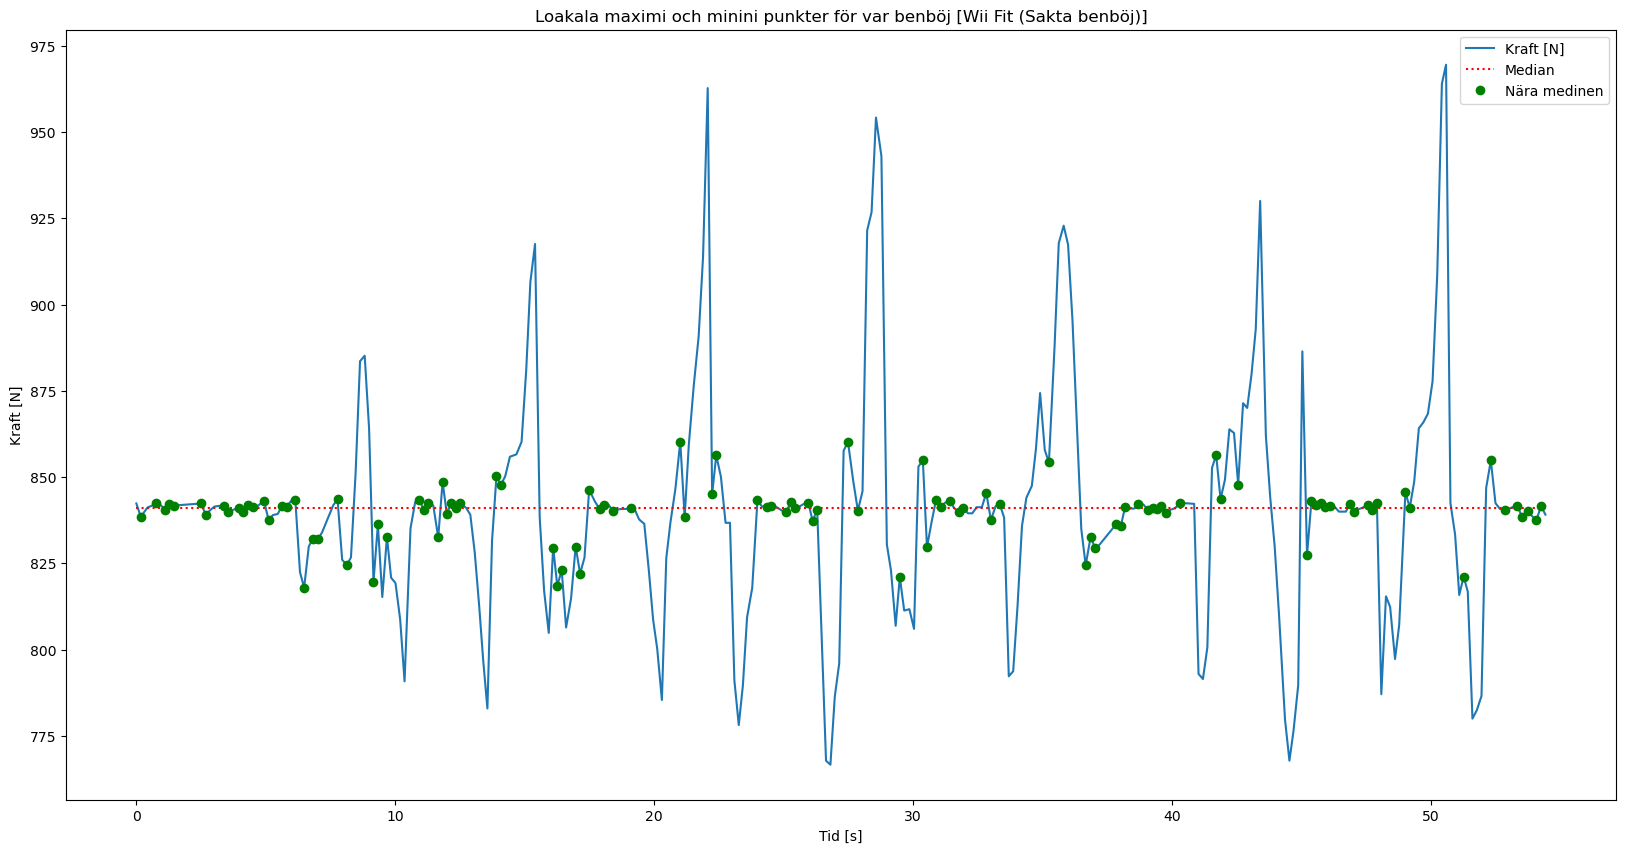

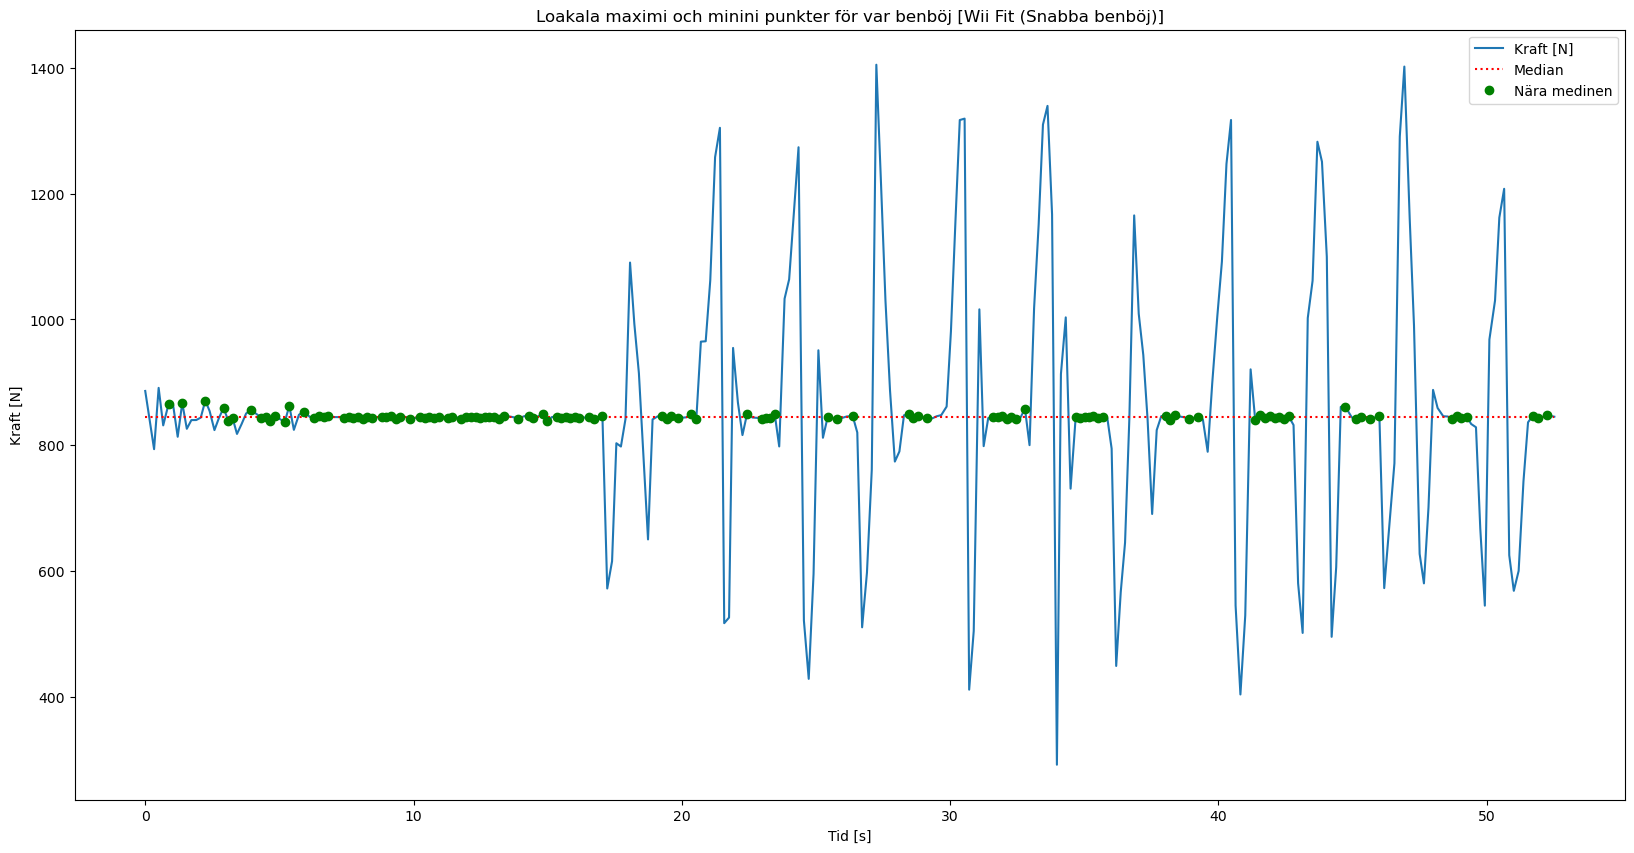

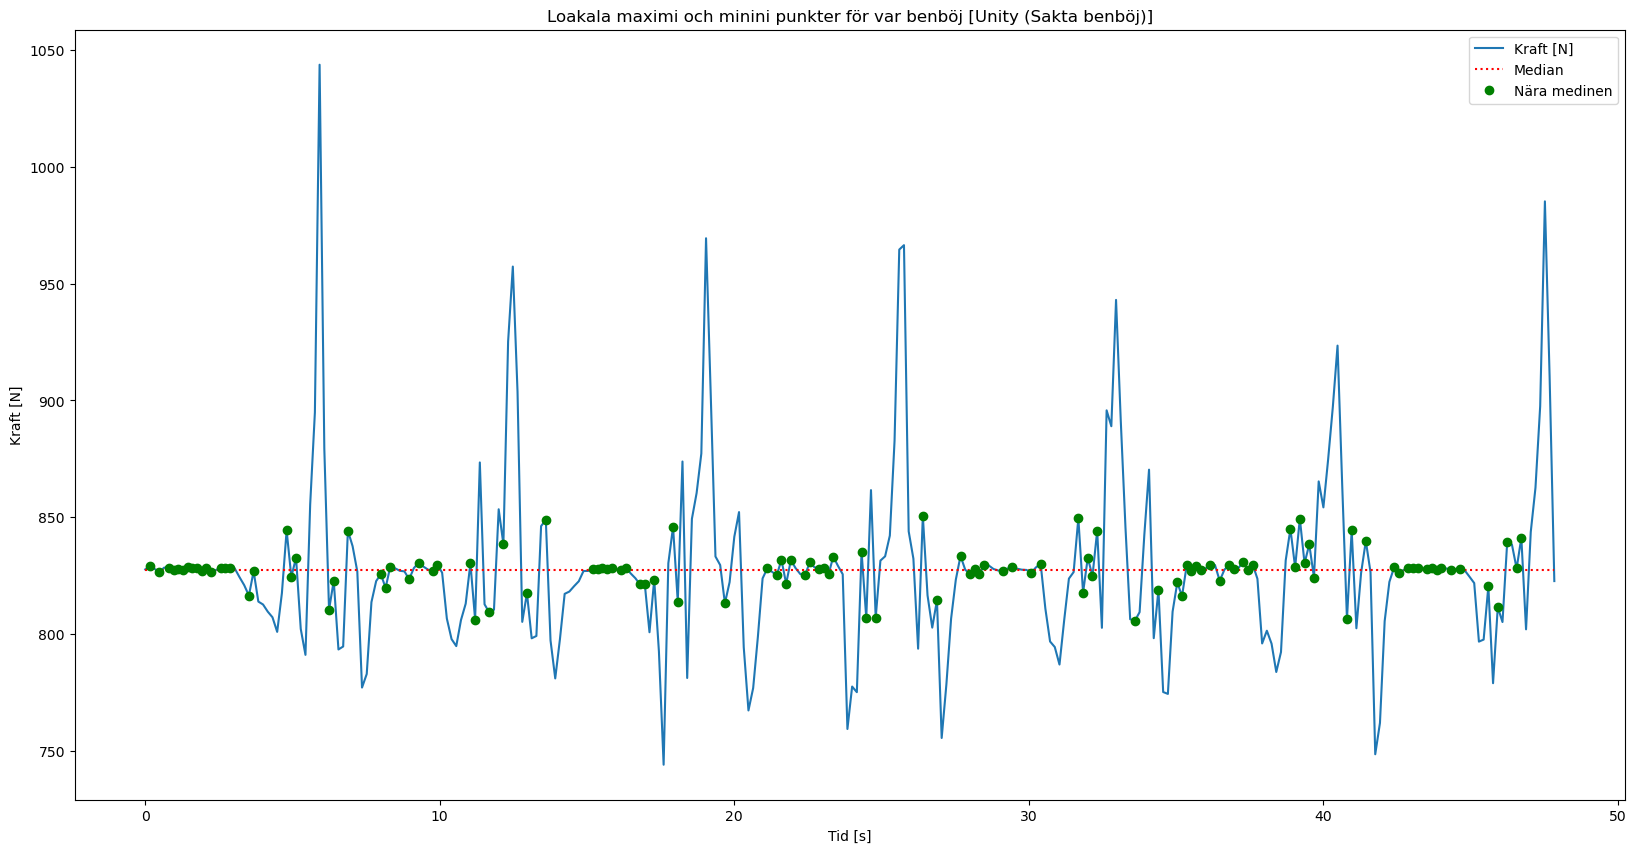

In [270]:
#Import math Library
import math

def showMaximaAndMinimaForDataframe(dataframe, rangeTo, title, nrOfSquats):
    sliceOfData = dataframe[0:rangeTo]

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

    ax1.plot(sliceOfData['time'], sliceOfData['force'], label="Kraft [N]")
    ax1.set_title(f"Loakala maximi och minini punkter för var benböj [{title}]")
    ax1.set_xlabel("Tid [s]")
    ax1.set_ylabel("Kraft [N]")
    ax1.hlines(y=sliceOfData['force'].median(), xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyle="dotted", color="red", label="Median")


    ## För att få ut derivatan får man gå tillbaks till grunden för vad derivata är.
    ## delta y / delta x.

    #difference = sliceOfData.diff()
    #derivative = difference.eval('force/time')
    #ax1.plot(sliceOfData['time'], derivative, 'ro', label="derivative")
    #ax1.vlines(sliceOfData['time'], derivative, colors="gray", alpha=0.5, ymax=1500, linestyles="dotted")
    #ax1.hlines(y=0, xmin=0, xmax=16, colors="gray", alpha=0.5)




    localMaximaForce = []
    localMaximaTime = []

    localMinimaForce = []
    localMinimaTime = []


    i = 1
    while(i < sliceOfData['force'].shape[0]):
        if(i == sliceOfData['force'].shape[0] - 1):
            break

        if(sliceOfData['force'][i] > sliceOfData['force'][i+1] and sliceOfData['force'][i] > sliceOfData['force'][i-1]):
            localMaximaForce.append(sliceOfData['force'][i])
            localMaximaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        if(sliceOfData['force'][i] < sliceOfData['force'][i+1] and sliceOfData['force'][i] < sliceOfData['force'][i-1]):
            localMinimaForce.append(sliceOfData['force'][i])
            localMinimaTime.append(sliceOfData['time'][i])
            i = i + 1
            continue
        
        i = i + 1


    #ax1.plot(localMaximaTime,localMaximaForce, 'go', label="Maximi")
    #ax1.plot(localMinimaTime,localMinimaForce, 'ro', label="Minimi")

    # Sortera efter storlek
    # Ta ut de 31 största.
    # Markera
    # Gör samma sak med minimi.
    #nrOfSquats = 4


    ## Detta ska okommenteras om man vill se alla punkter
    # ax1.plot(localMaximaTime,localMaximaForce, "ro", label="Lokal Maximi")
    # ax1.plot(localMinimaTime,localMinimaForce, "go", label="Lokal Minimi")

    data0 = {
        "time":localMaximaTime,
        "force":localMaximaForce,
        "maxima":True
    }
    data1 = {
        "time":localMinimaTime,
        "force":localMinimaForce,
        "maxima":False
    }
    
    df0 = pd.DataFrame(data0)
    df1 = pd.DataFrame(data1)
    dfFull = pd.concat([df0,df1])
    dfFull.sort_values(by='time')
    
    minimaForce0 = []
    minimaTime0 = []
    
    #for row in dfFull:
    # Titta om man är vid "near" ett visst värde.
    # Kolla toppar, och bottar. På något vis....   
    

    #Maximi
    dataMaxima = {
        "maxima":localMaximaForce,
        "time":localMaximaTime
    }

    dataframeMaxima = pd.DataFrame(data=dataMaxima)
    dataframeMaxima.sort_values(by="maxima", ascending=False, inplace=True)

    maximaForce = dataframeMaxima['maxima'][0:nrOfSquats]
    maximaTime = dataframeMaxima['time'][0:nrOfSquats]

    #ax1.plot(maximaTime,maximaForce, 'go', label="Maximi")

    #Minimi
    dataMinima = {
        "minima":localMinimaForce,
        "time":localMinimaTime
    }

    dataframeMinima = pd.DataFrame(data=dataMinima)
    dataframeMinima.sort_values(by="minima", ascending=True, inplace=True)

    minimaForce = dataframeMinima['minima'][0:nrOfSquats]
    minimaTime = dataframeMinima['time'][0:nrOfSquats]


    ## Test för att se om det går att hitta om det är nära Medianen.
    closeToMedianPointsForce = []
    closeToMedianPointsTime = []
    i = 0
    tolerance = 23
    while(i < len(dataframeMinima['minima'])):
        if(math.isclose(dataframeMinima['minima'][i], sliceOfData['force'].mean(), abs_tol=tolerance)):
            closeToMedianPointsForce.append(dataframeMinima['minima'][i])
            closeToMedianPointsTime.append(dataframeMinima['time'][i])
        i = i + 1
    
    i = 0
    while(i < len(dataframeMaxima['maxima'])):
        if(math.isclose(dataframeMaxima['maxima'][i], sliceOfData['force'].mean(), abs_tol=tolerance)):
            closeToMedianPointsForce.append(dataframeMaxima['maxima'][i])
            closeToMedianPointsTime.append(dataframeMaxima['time'][i])
        i = i + 1
    
    ax1.plot(closeToMedianPointsTime,closeToMedianPointsForce, 'go', label="Nära medinen")
                
    #ax1.plot(minimaTime,minimaForce, 'ro', label="Minimi")

    #averageMaxForce = maximaForce.mean()
    #averageMinForce = minimaForce.mean()

    #ax1.text(x=0, y=averageMaxForce + 10, s=f"Medel-max-kraft: {averageMaxForce:.3f} [N]", fontsize=22)
    #ax1.text(x=0, y=averageMinForce + 10, s=f"Medel-min-kraft: {averageMinForce:.3f} [N]", fontsize=22)

    #ax1.hlines(y=averageMaxForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-max-kraft", colors="gray")
    #ax1.hlines(y=averageMinForce, xmin=sliceOfData['time'].min(), xmax=sliceOfData['time'].max(), linestyles="dotted", label="Medel-min-kraft", colors="black" )



    ax1.legend()
    plt.show()

#showMaximaAndMinimaForDataframe(dataframe=unityDF, rangeTo=200, title="Unity", nrOfSquats=9)
showMaximaAndMinimaForDataframe(dataframe=wiiFitSlowDF, rangeTo=300, title="Wii Fit (Sakta benböj)", nrOfSquats=4)
showMaximaAndMinimaForDataframe(dataframe=wiiFitFastDF, rangeTo=300, title="Wii Fit (Snabba benböj)", nrOfSquats=4)
showMaximaAndMinimaForDataframe(dataframe=unitySlowDF, rangeTo=300, title="Unity (Sakta benböj)", nrOfSquats=4)
#showMaximaAndMinimaForDataframe(dataframe=unityFastDF, rangeTo=100, title="Unity (Snabba benböj) ", nrOfSquats=4)




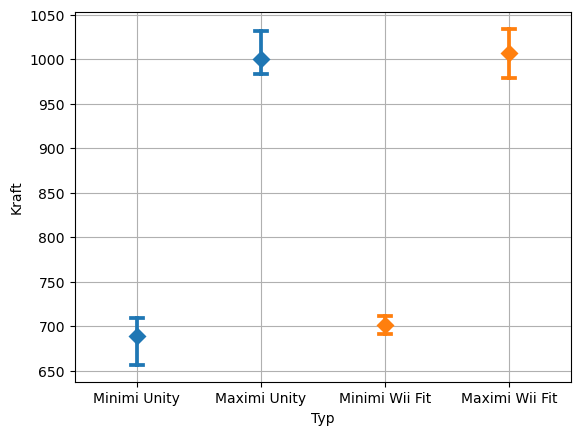

In [24]:
def concatIntoDF(minimaForce, maximaForce, name):
    data0 = {
        "Typ":f"Minimi {name}",
        "Kraft":minimaForce,
    }

    data1 = {
        "Typ":f"Maximi {name}",
        "Kraft":maximaForce,
    }

    plottedDataFrame0 = pd.DataFrame(data=data0)
    plottedDataFrame1 = pd.DataFrame(data=data1)

    plottedDataFrame = pd.concat([plottedDataFrame0, plottedDataFrame1])
    return plottedDataFrame


def showPointPlot(minimaForce0, maximaForce0, minimaForce1, maximaForce1):
    plottedUnityDataFrame = concatIntoDF(minimaForce0, maximaForce0, "Unity")
    plottedWiiFitDataFrame = concatIntoDF(minimaForce1, maximaForce1, "Wii Fit")


    fig, ax =plt.subplots(1,1)
    sns.pointplot(data=plottedUnityDataFrame, x="Typ", y="Kraft", linestyles='none', markers='D', capsize=.1, legend=True)
    sns.pointplot(data=plottedWiiFitDataFrame, x="Typ", y="Kraft", linestyles='none', markers='D', capsize=.1, legend=True)
    plt.grid()
    
    
showPointPlot(minimaForceUnity, maximaForceUnity, minimaForceWiiFit, maxmiaForceWiiFit)
